# Испорт библиотек

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.stats import boxcox
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro, f_oneway, kruskal, mannwhitneyu

## Описание данных

### Люди (People)

- **ID**: уникальный идентификатор клиента  
- **Year_Birth**: год рождения клиента  
- **Education**: уровень образования клиента  
- **Marital_Status**: семейное положение клиента  
- **Income**: годовой доход домохозяйства клиента  
- **Kidhome**: количество детей в домохозяйстве клиента  
- **Teenhome**: количество подростков в домохозяйстве клиента  
- **Dt_Customer**: дата регистрации клиента в компании  
- **Recency**: количество дней с последней покупки клиента  
- **Complain**: 1 — если клиент жаловался за последние 2 года, 0 — иначе  

### Продукты (Products)

- **MntWines**: сумма, потраченная на вино за последние 2 года  
- **MntFruits**: сумма, потраченная на фрукты за последние 2 года  
- **MntMeatProducts**: сумма, потраченная на мясо за последние 2 года  
- **MntFishProducts**: сумма, потраченная на рыбу за последние 2 года  
- **MntSweetProducts**: сумма, потраченная на сладости за последние 2 года  
- **MntGoldProds**: сумма, потраченная на золото за последние 2 года  

### Акции (Promotion)

- **NumDealsPurchases**: количество покупок со скидкой  
- **AcceptedCmp1**: 1 — клиент принял участие в первой кампании, 0 — иначе  
- **AcceptedCmp2**: 1 — клиент принял участие во второй кампании, 0 — иначе  
- **AcceptedCmp3**: 1 — клиент принял участие в третьей кампании, 0 — иначе  
- **AcceptedCmp4**: 1 — клиент принял участие в четвёртой кампании, 0 — иначе  
- **AcceptedCmp5**: 1 — клиент принял участие в пятой кампании, 0 — иначе  
- **Response**: 1 — клиент принял участие в последней кампании, 0 — иначе  

### Место (Place)

- **NumWebPurchases**: количество покупок через сайт компании  
- **NumCatalogPurchases**: количество покупок через каталог  
- **NumStorePurchases**: количество покупок в магазине  
- **NumWebVisitsMonth**: количество посещений сайта компании за последний месяц  


# Импортируем данные

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# EDA

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

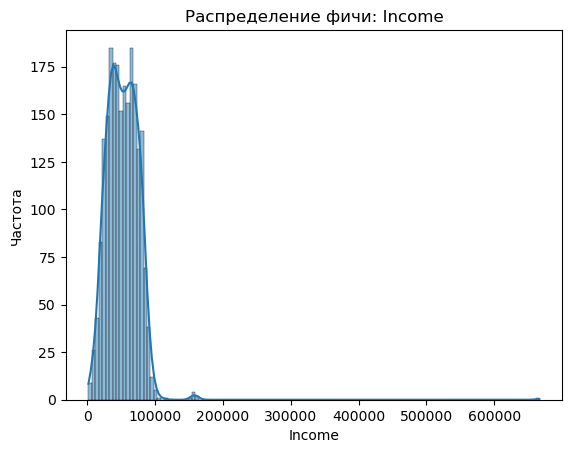

In [6]:
feature = 'Income'

sns.histplot(data[feature].dropna(), kde=True)
plt.title(f'Распределение фичи: {feature}')
plt.xlabel(feature)
plt.ylabel('Частота')
plt.show()

In [7]:
data['Income'] = data['Income'].fillna(data['Income'].mode()[0])
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)

print("newest customer:", data["Dt_Customer"].max().date())
print("oldest customer:", data["Dt_Customer"].min().date())


newest customer: 2014-06-29
oldest customer: 2012-07-30


In [9]:
latest_date = data["Dt_Customer"].max()

data["Customer_For"] = (latest_date - data["Dt_Customer"]).dt.days

In [10]:
data["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
data["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

# Feature Engineering

In [12]:
#Возраст
data["Age"] = 2021-data["Year_Birth"]

#Общая потраченная сумма
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Живет один/ не один
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Сколько детей
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Количество членов семьи
living_with_numeric = data["Living_With"].map({"Alone": 1, "Partner": 2}).astype(int)
data["Family_Size"] = living_with_numeric + data["Children"]

#Упрощаем группы образования
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Количество акций, где участвовал человек
data['Promotion'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

#Упрощаем названия для понятности
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

data = data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1)

In [13]:
data['Education']

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education, Length: 2240, dtype: object

In [14]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_For,Age,Spent,Children,Family_Size,Promotion
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51767.816518,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,2.662054,5.790179,5.316518,0.009375,353.582143,52.194196,605.798214,0.950446,2.595089,0.446875
std,25458.285477,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.923101,3.250958,2.426645,0.096391,202.122512,11.984069,602.249288,0.751803,0.906959,0.890543
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000
25%,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,180.750000,44.000000,68.750000,0.000000,2.000000,0.000000
50%,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,2.000000,5.000000,6.000000,0.000000,355.500000,51.000000,396.000000,1.000000,3.000000,0.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,529.000000,62.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,28.000000,13.000000,20.000000,1.000000,699.000000,128.000000,2525.000000,3.000000,5.000000,5.000000


In [15]:
num_cols = data.loc[:, data.dtypes != 'object'].columns
num_cols

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Customer_For', 'Age', 'Spent', 'Children', 'Family_Size',
       'Promotion'],
      dtype='object')

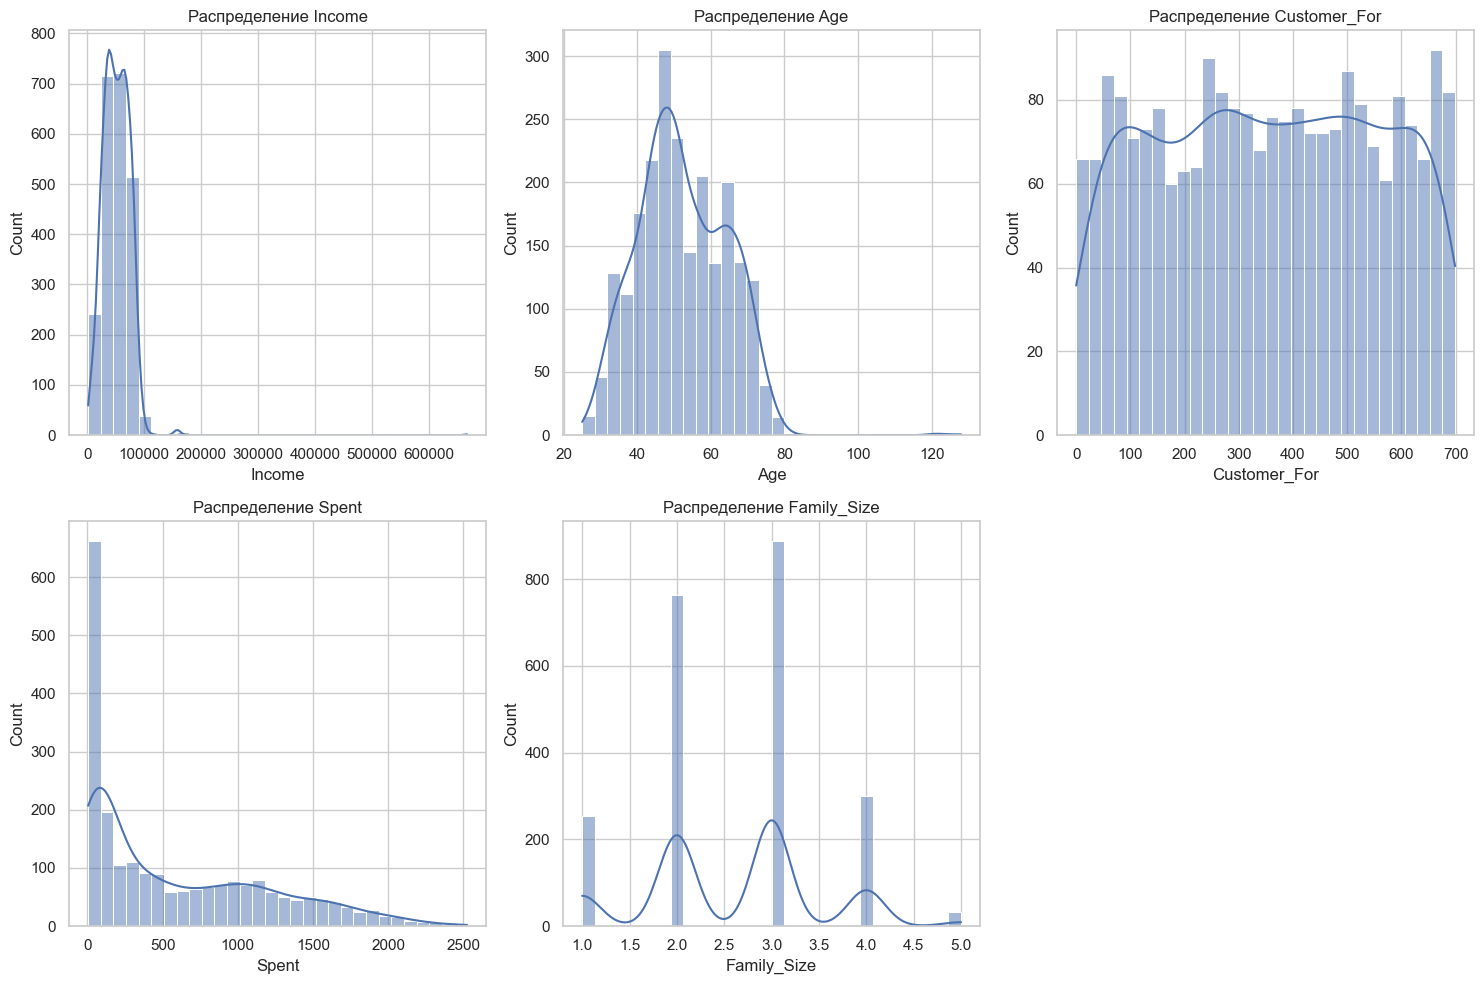

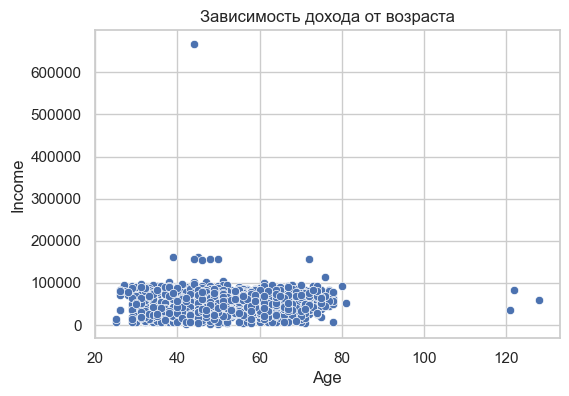

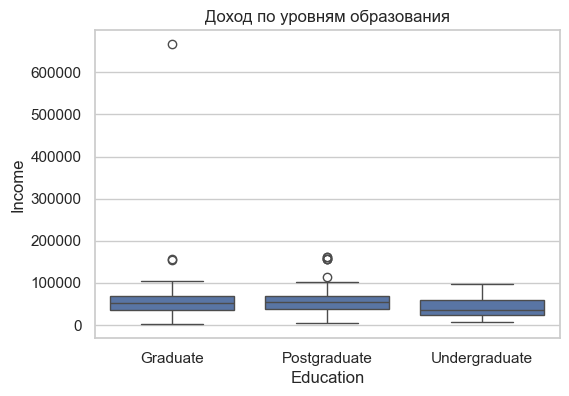

In [16]:
sns.set(style="whitegrid")

features = ["Income", "Age", "Customer_For", "Spent", "Family_Size"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature].dropna(), kde=True, bins=30)
    plt.title(f"Распределение {feature}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Income", data=data)
plt.title("Зависимость дохода от возраста")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Education", y="Income", data=data)
plt.title("Доход по уровням образования")
plt.show()

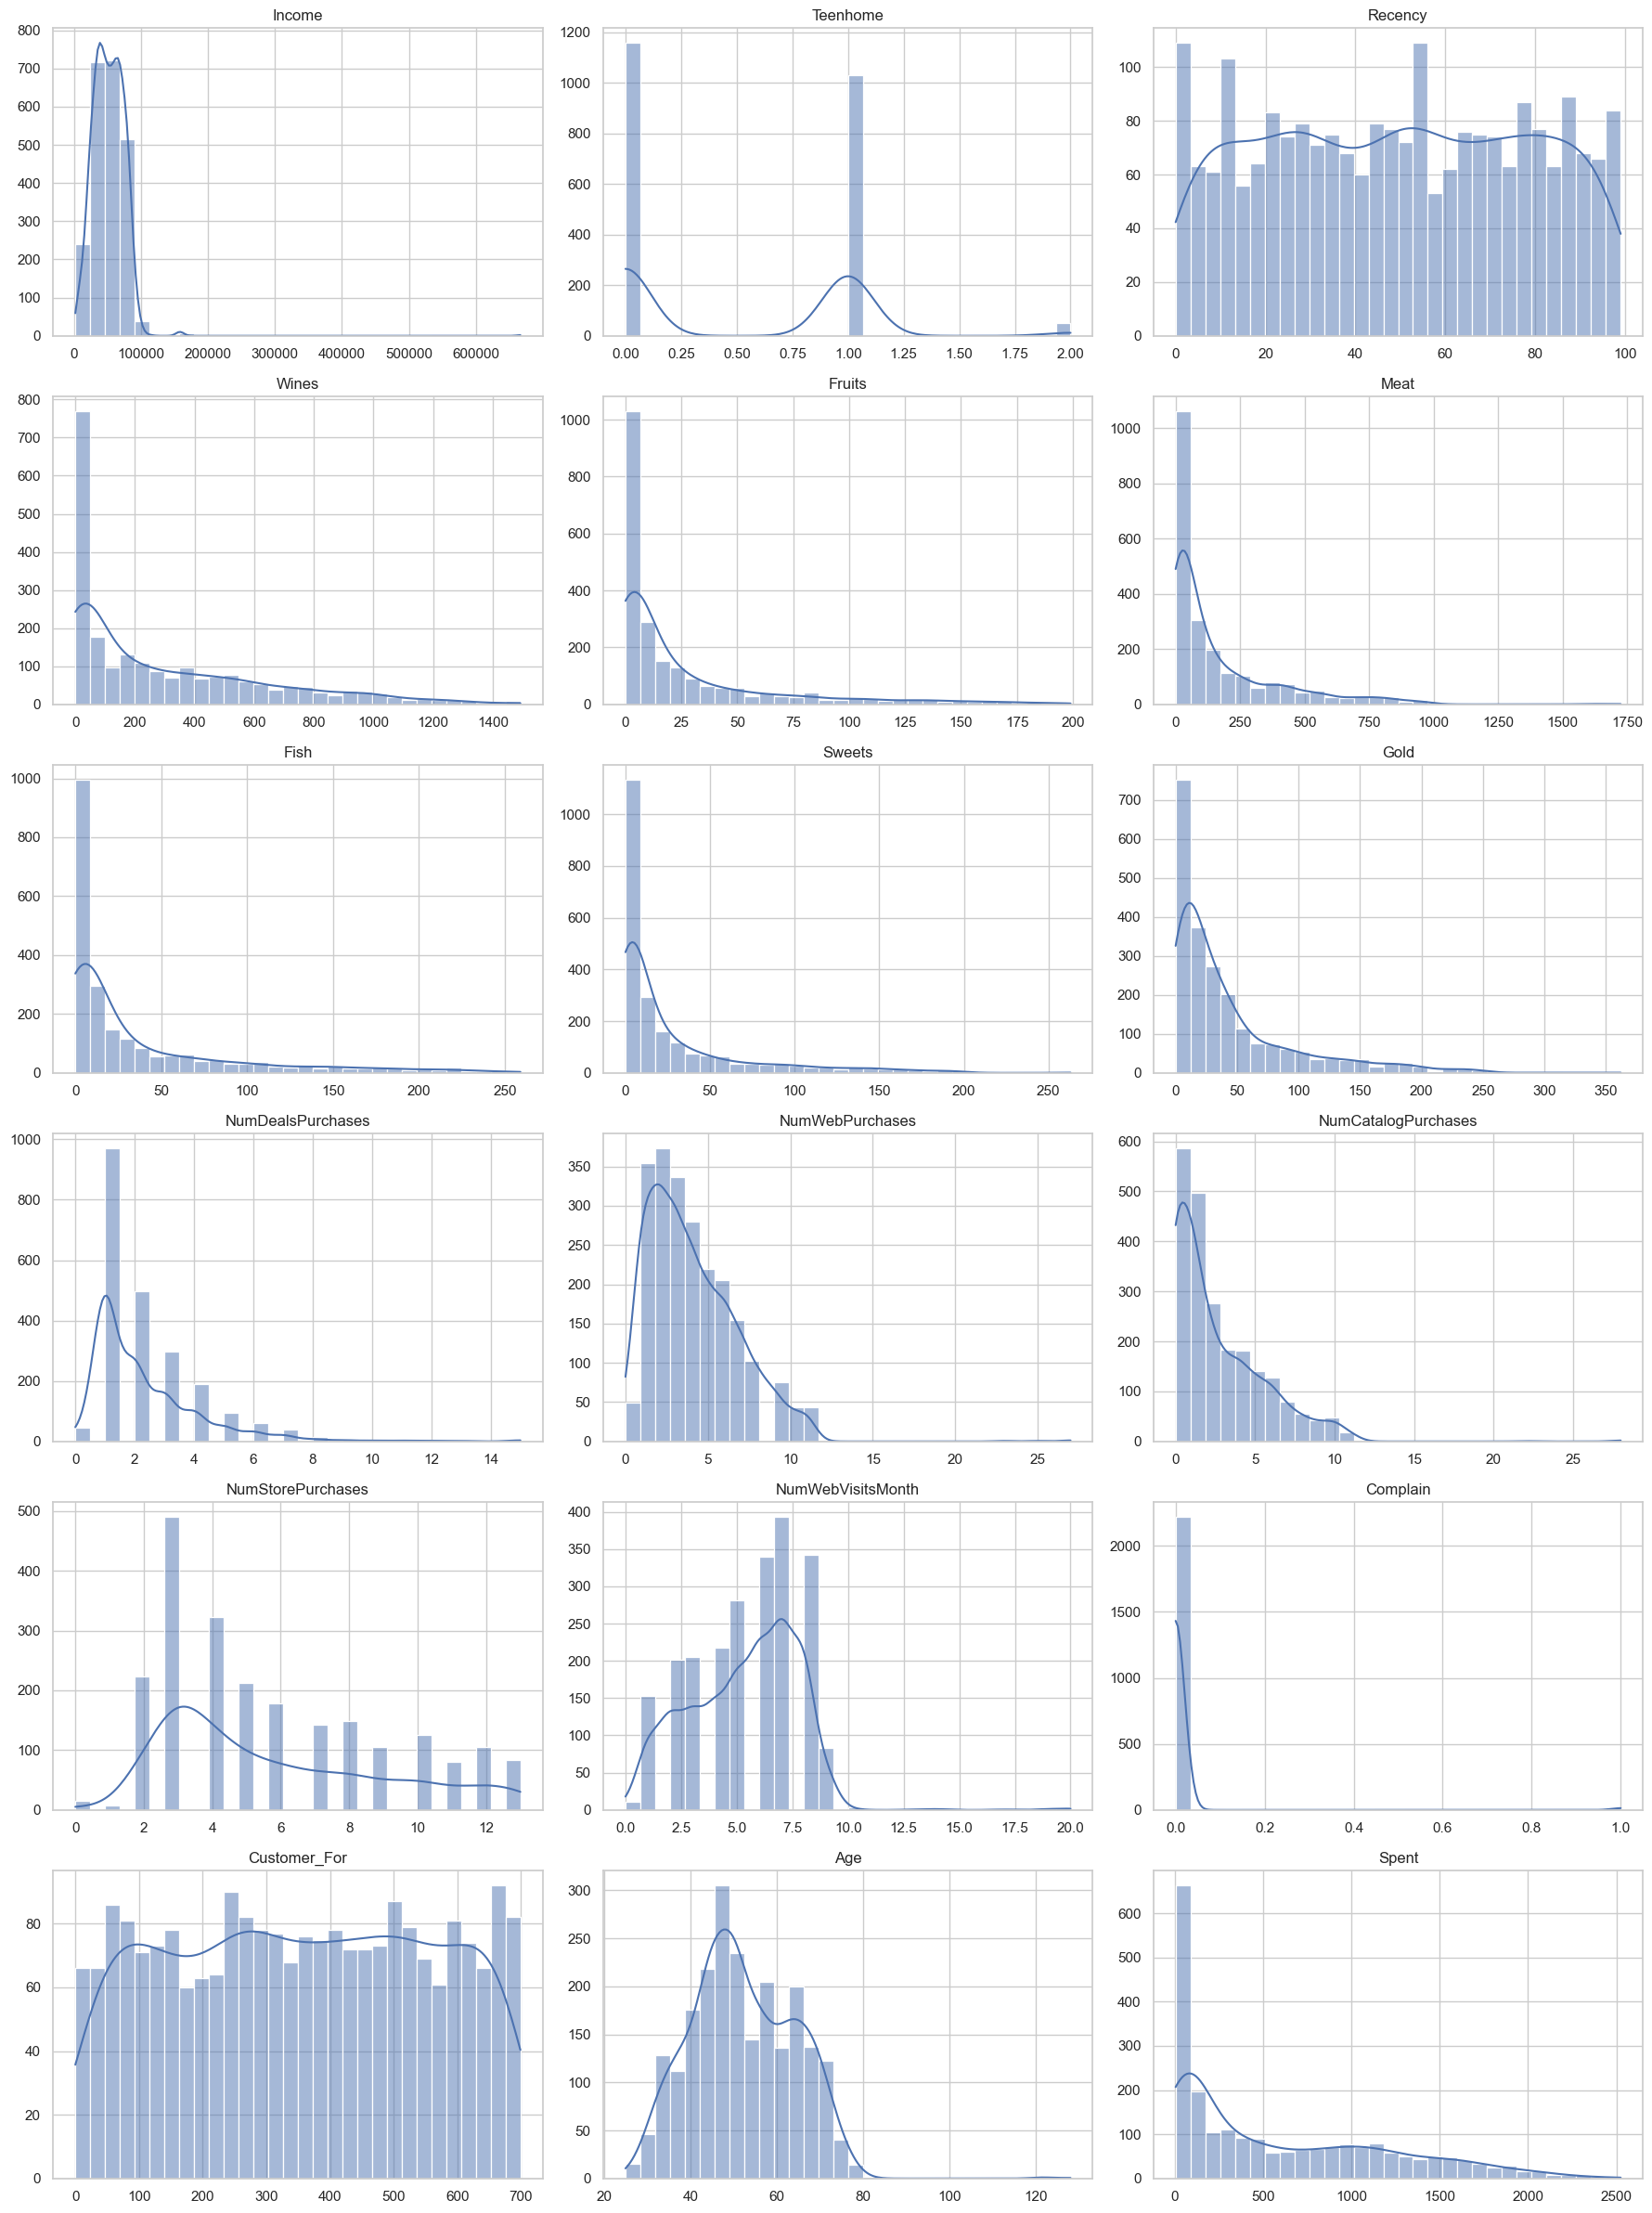

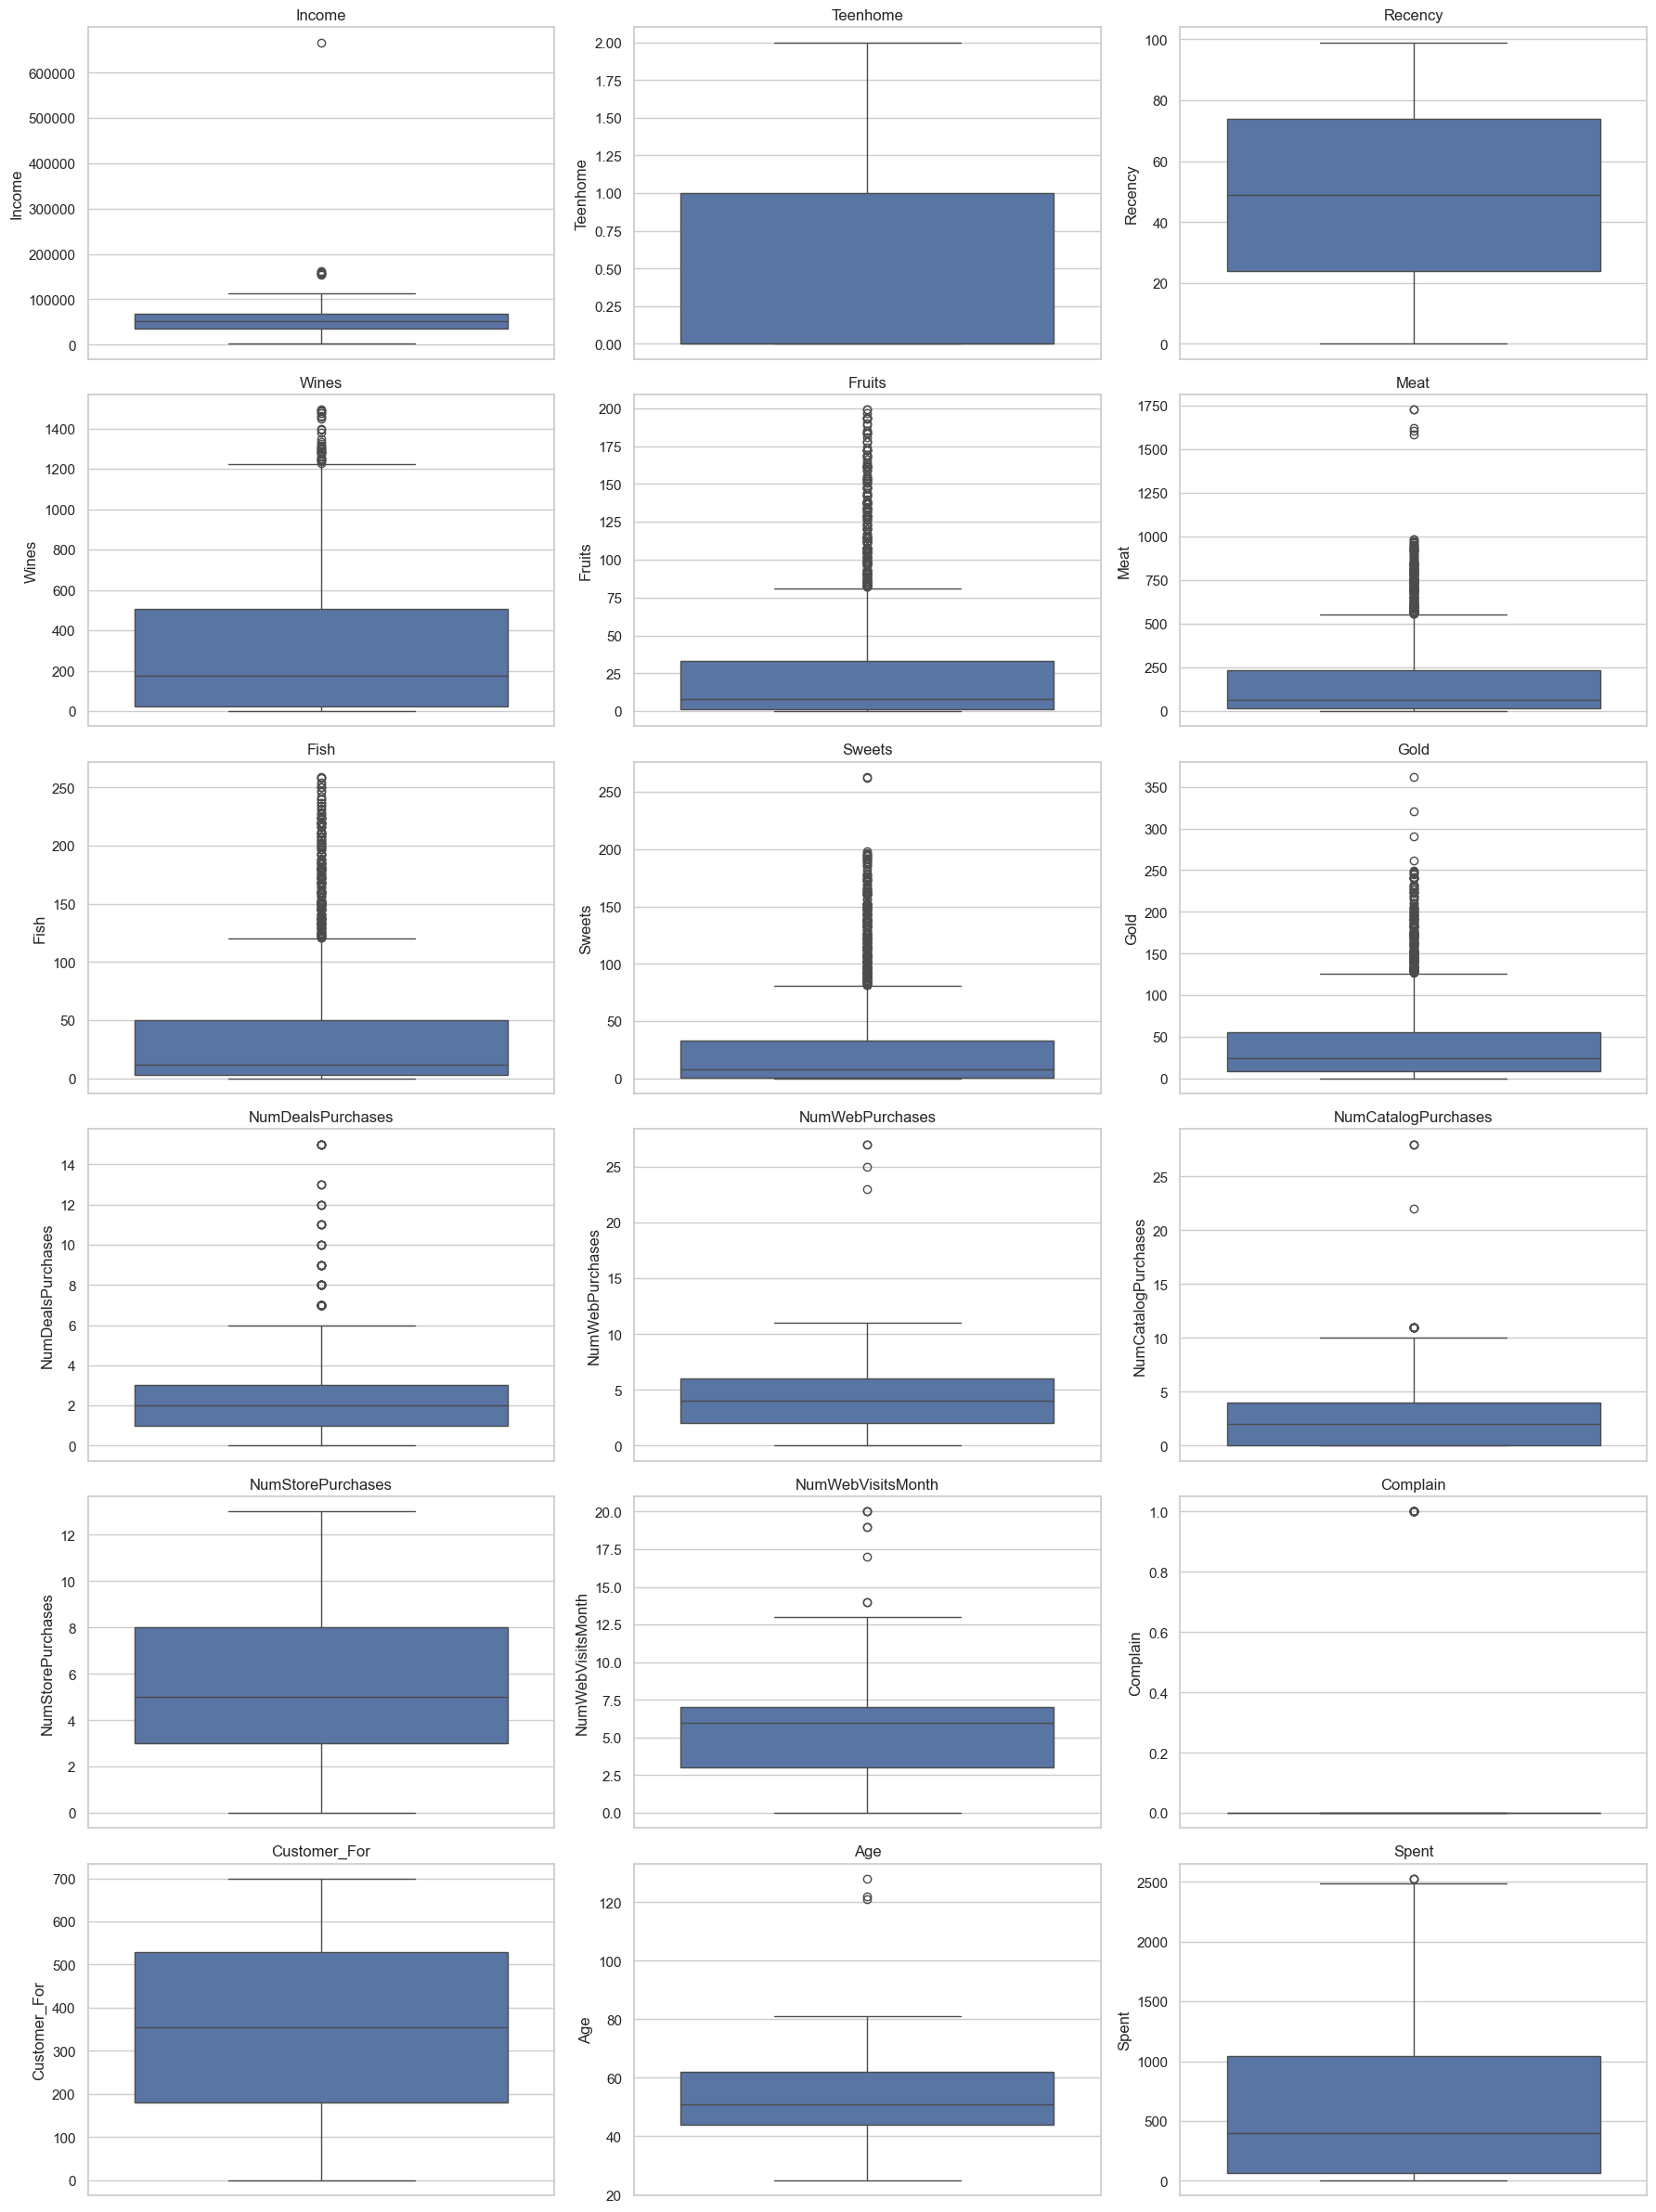

In [17]:
num_features = ['Income','Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Customer_For', 'Age', 'Spent']

n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols 

plt.figure(figsize=(cols * 6, rows * 4))

for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data[feature].dropna(), kde=True, bins=30)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


n = len(num_features)
columns = 3
rows = (n + columns - 1) // columns 

plt.figure(figsize=(columns * 6, rows * 4))

for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, columns, i)
    sns.boxplot(data=data, y=feature)
    plt.title(feature)
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [18]:
for col in ['Teenhome', 'Complain']:
    print(f"Value counts for '{col}")
    print(data[col].value_counts(dropna=False))

Value counts for 'Teenhome
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64
Value counts for 'Complain
Complain
0    2219
1      21
Name: count, dtype: int64


#### Распределение во многих случаях смещено влево и есть тяжелые хвосты, это может повлиять на алгоритмы, основанные на расстоянии: K-means, иерархическая агломеративная кластеризация с евклидовым расстояние. При смещенных признаках расстояние между объектами может быть искажено.

In [19]:
num_features_lognorm = ['Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 
    'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                        'NumStorePurchases', 'Spent']
data[num_features_lognorm].describe()

,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Spent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,605.798214
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,68.750000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,396.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,1045.500000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,2525.000000


#### При использовании логарифмирования данные смещаются вправо сильно из-за тяжелых хвостов, поэтому применю метод Бокс-Кокс.

Для каждого значения x (x>0 строго, из-за этого в коде я добавляю небольшую eps) преобразование определяется параметром $alpha$.

In [20]:
for col in num_features_lognorm:
    if any(data[col] <= 0 ):
        data[col] = data[col] + 1e-6
    data[col], lambda_ = boxcox(data[col])

print(f'Best lamda: {lambda_}')

Best lamda: 0.17947022740229895


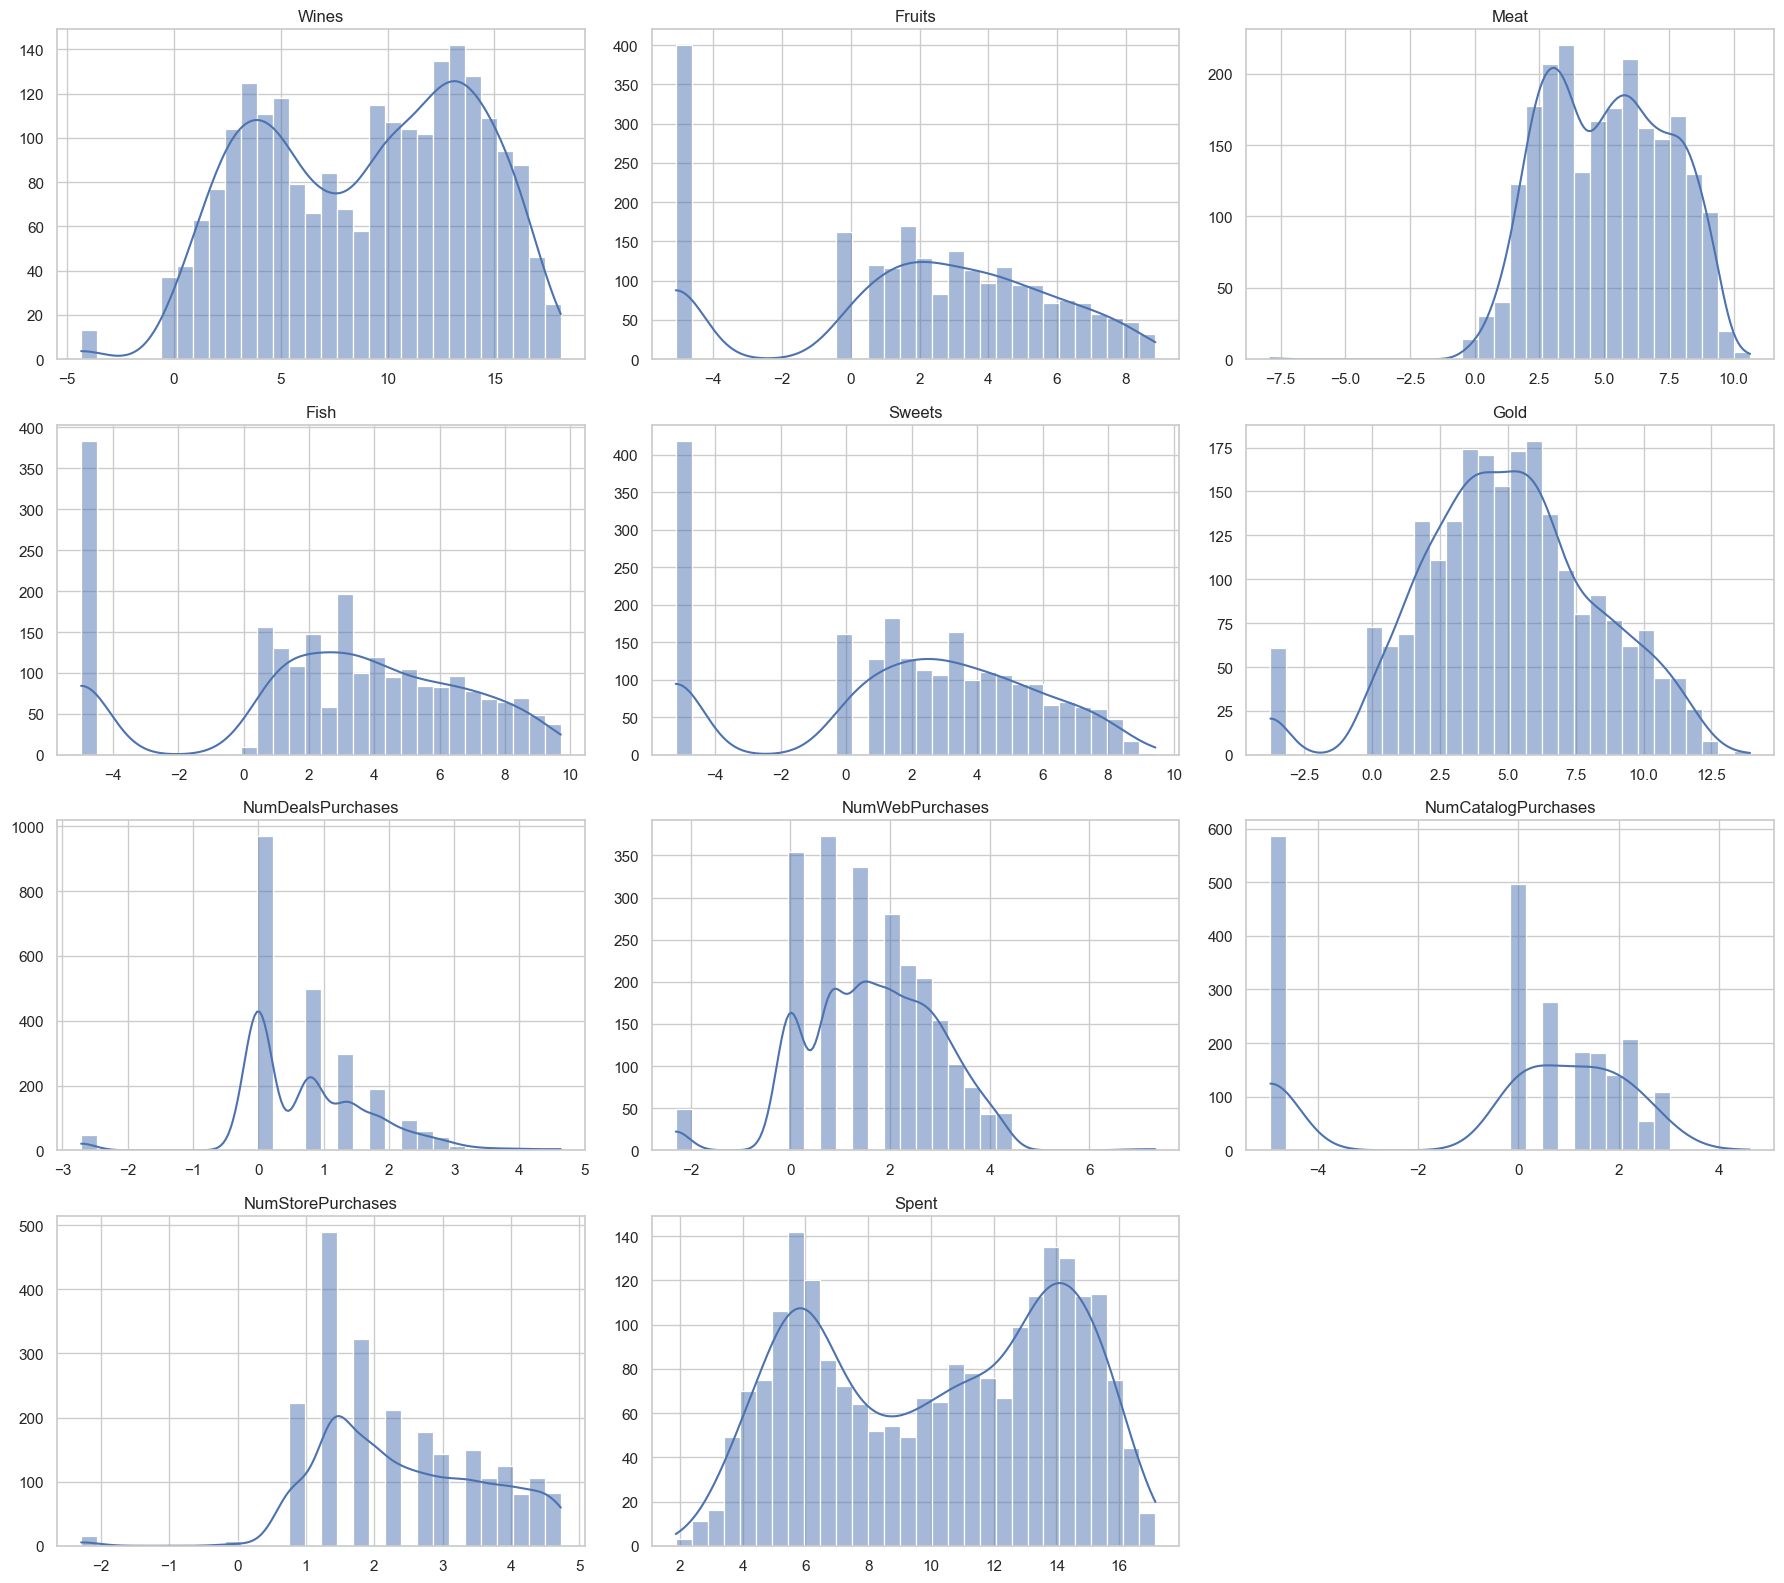

In [21]:
n = len(num_features_lognorm)
cols = 3
rows = (n + cols - 1) // cols 

plt.figure(figsize=(cols * 6, rows * 4))

for i, feature in enumerate(num_features_lognorm, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data[feature].dropna(), kde=True, bins=30)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [22]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Customer_For', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Promotion'],
      dtype='object')

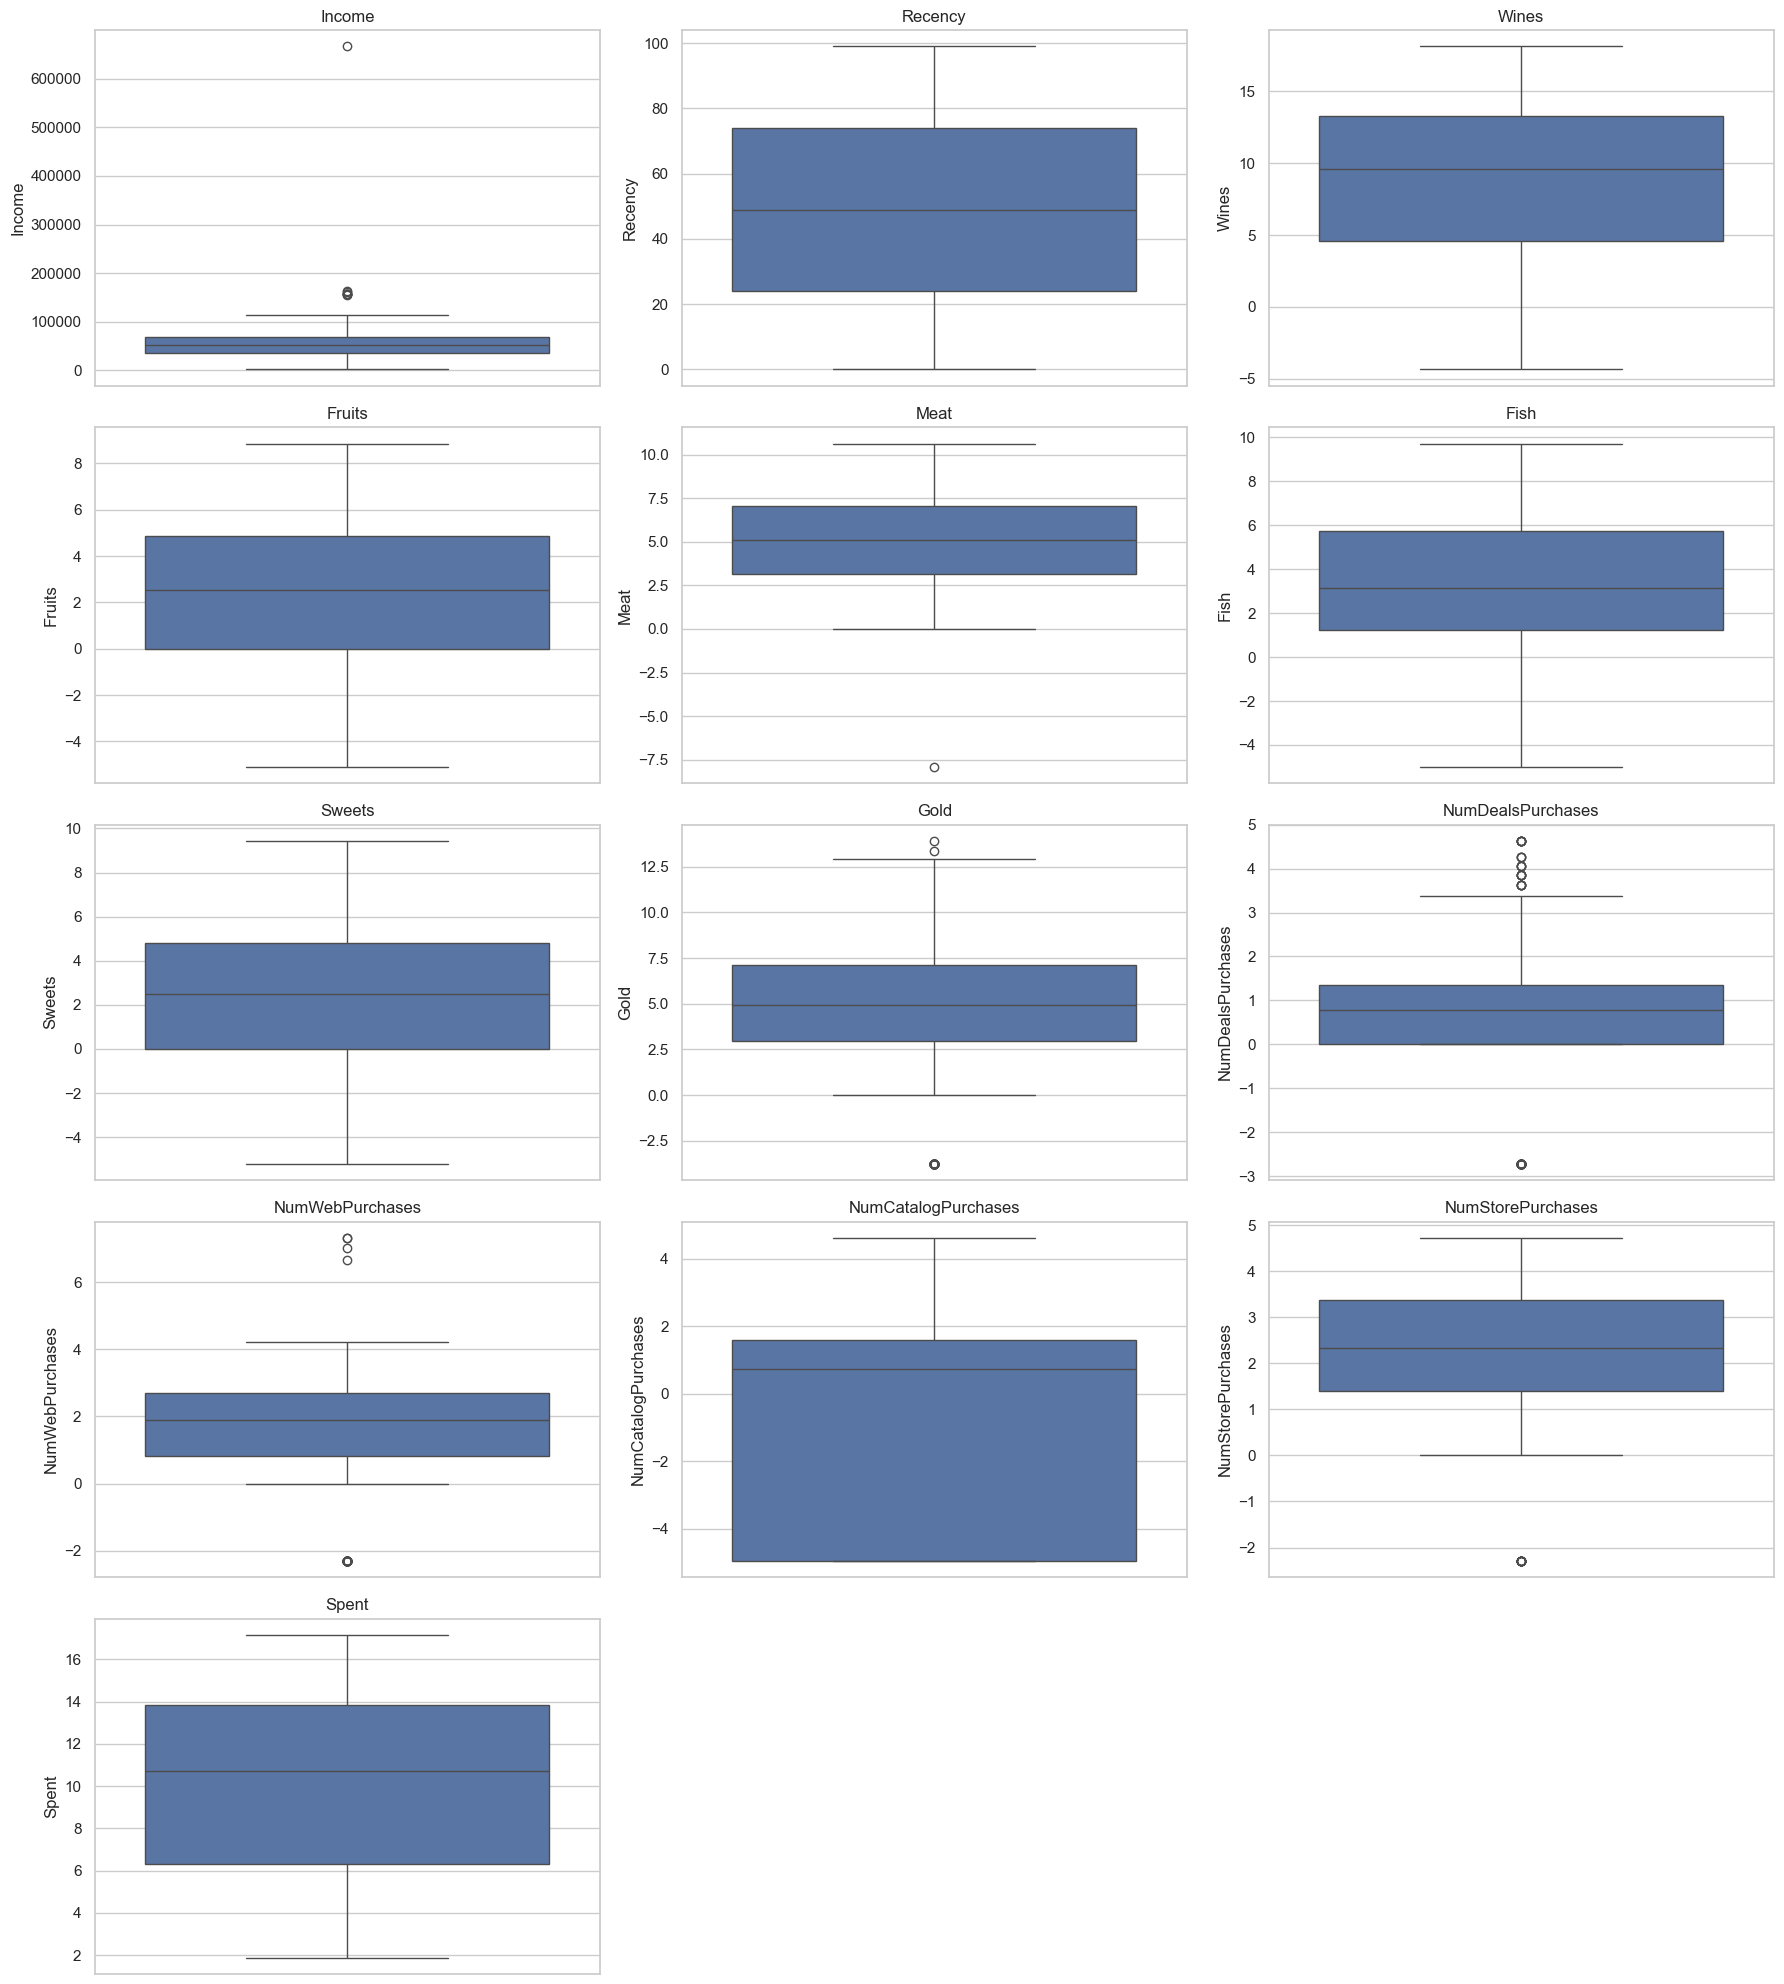

In [23]:
sns.set(style="whitegrid")

cols = ['Income','Recency', 'Wines', 'Fruits', 'Meat',
        'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'Spent']

n = len(cols)
columns = 3
rows = (n + columns - 1) // columns  # округление вверх

plt.figure(figsize=(columns * 6, rows * 4))

for i, feature in enumerate(cols, 1):
    plt.subplot(rows, columns, i)
    sns.boxplot(data=data, y=feature)
    plt.title(feature)
    plt.xlabel("")

plt.tight_layout()
plt.show()


# Избавлемся от выбросов сильных

In [24]:
print(f"Количество строк перед удалением выбросов: {data.shape[0]}")

for col in ['Income','Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_For', 'Age', 'Spent']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"Осталось строк после удаления выбросов: {data.shape[0]}")

Количество строк перед удалением выбросов: 2240
Осталось строк после удаления выбросов: 2178


# Удаляем сильно коррелирующие признаки

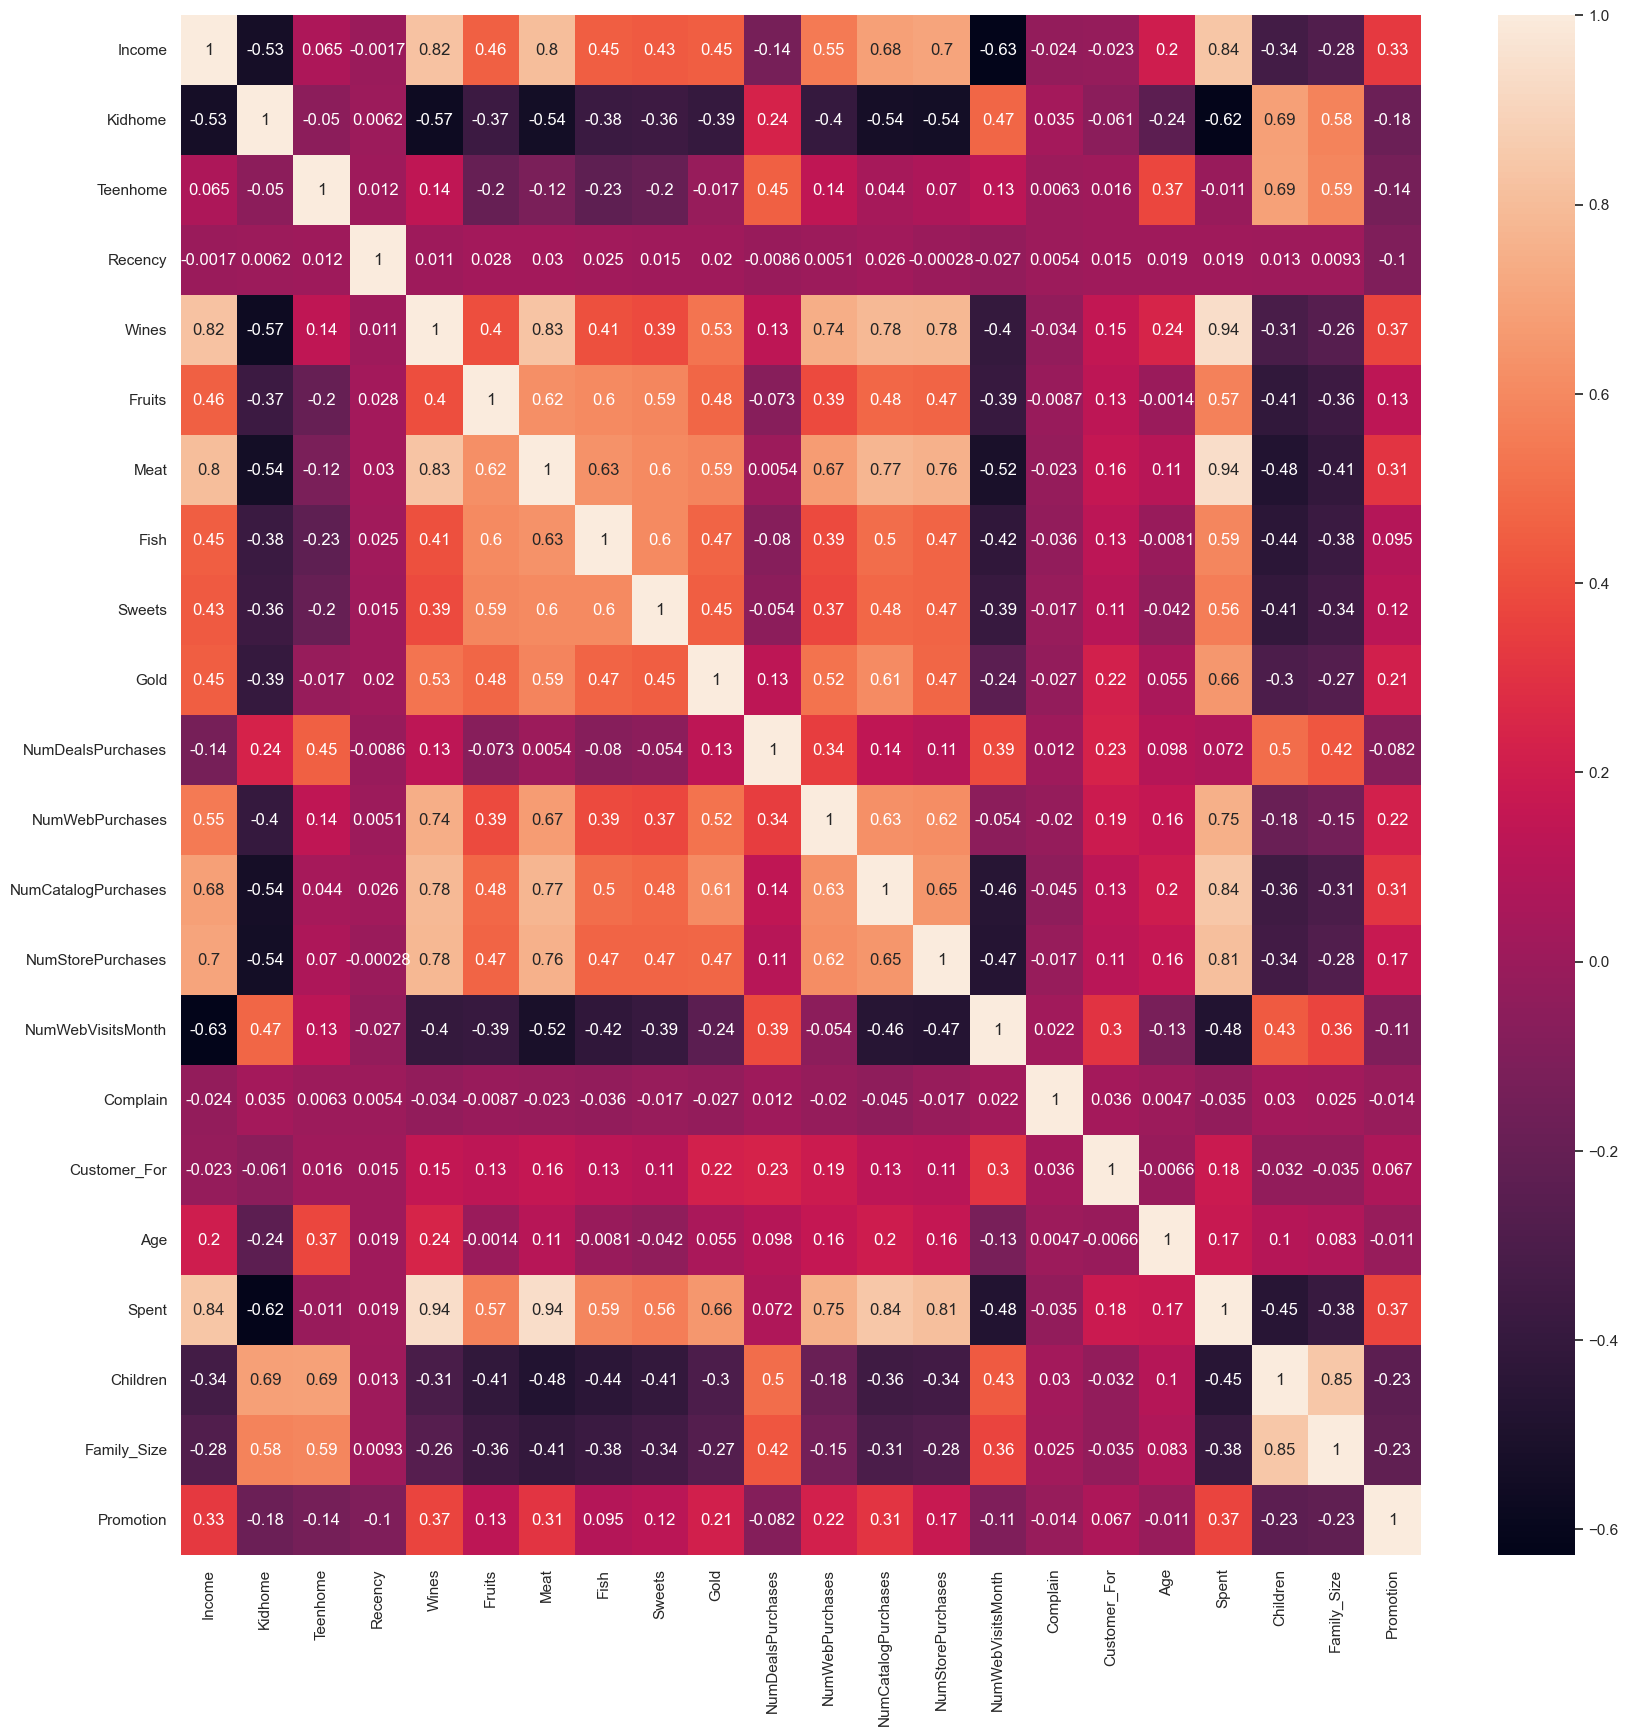

In [25]:
corrmat= data[num_cols].corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True)
plt.show()

In [26]:
corr_matrix = data[num_cols].corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]

print(f"Удаляем признаки с корреляцией > 0.75: {to_drop}")

data_reduced = data.drop(columns=to_drop)

Удаляем признаки с корреляцией > 0.75: ['Wines', 'Meat', 'NumCatalogPurchases', 'NumStorePurchases', 'Spent', 'Family_Size']


In [27]:
data.shape

(2178, 24)

# Кодировка категориальных признаков

In [28]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [29]:
data = pd.get_dummies(data, columns=['Living_With'], drop_first=True, dtype=int)
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Complain,Customer_For,Age,Spent,Children,Family_Size,Promotion,Living_With_Partner
0,Graduate,58138.0,0,0,58,14.226934,6.887671e+00,8.493061,8.610455,6.799265e+00,...,1.904544,7,0,663,64,15.411428,0,1,1,0
1,Graduate,46344.0,1,1,38,3.155862,9.999996e-07,1.944989,0.739624,9.999996e-07,...,0.809371,5,0,113,67,4.494922,2,3,0,0
2,Graduate,71613.0,0,0,26,12.651268,5.641854e+00,6.077851,7.518697,4.022535e+00,...,3.967078,4,0,312,56,12.821009,0,2,0,1
3,Graduate,26646.0,1,0,26,3.155862,1.574959e+00,3.440483,2.871718,1.211481e+00,...,1.904544,6,0,139,37,5.790280,1,3,0,1
4,Postgraduate,58293.0,1,0,94,9.563260,5.381424e+00,5.964352,5.573735,4.460562e+00,...,2.716634,5,0,161,40,10.916236,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,14.686917,5.381424e+00,6.644480,5.390369,7.458915e+00,...,1.904544,5,0,381,54,14.718321,1,3,0,1
2236,Postgraduate,64014.0,2,1,56,12.470611,-5.086333e+00,3.981880,-4.979991,-5.199898e+00,...,2.333653,7,0,19,75,11.067305,3,5,1,1
2237,Graduate,56981.0,0,0,91,15.760678,5.600335e+00,6.928242,4.860319,3.113760e+00,...,4.726155,6,0,155,40,14.438065,0,1,1,0
2238,Postgraduate,69245.0,0,1,8,12.668967,4.694606e+00,6.905618,6.758275,4.650015e+00,...,3.967078,3,0,156,65,13.096421,1,3,0,1


In [30]:
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])

In [31]:
data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                  float64
Fruits                 float64
Meat                   float64
Fish                   float64
Sweets                 float64
Gold                   float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth        int64
Complain                 int64
Customer_For             int64
Age                      int64
Spent                  float64
Children                 int64
Family_Size              int64
Promotion                int64
Living_With_Partner      int64
dtype: object

# Стандартизация данных

In [32]:
X = data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение

### K-means

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

cluster_range = range(2, 11)

best_silhouette = -1
best_calinski = -1
best_davies = float('inf')

best_k_silhouette = None
best_k_calinski = None
best_k_davies = None

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, labels)
    cal_score = calinski_harabasz_score(X_scaled, labels)
    dav_score = davies_bouldin_score(X_scaled, labels)

    print(f"k={k} | Silhouette: {sil_score:.4f}, Calinski-Harabasz: {cal_score:.2f}, Davies-Bouldin: {dav_score:.4f}")

    if sil_score > best_silhouette:
        best_silhouette = sil_score
        best_k_silhouette = k

    if cal_score > best_calinski:
        best_calinski = cal_score
        best_k_calinski = k

    if dav_score < best_davies:
        best_davies = dav_score
        best_k_davies = k

print("\n🔍 Лучшие результаты:")
print(f"Silhouette Score: k = {best_k_silhouette}, score = {best_silhouette:.4f}")
print(f"Calinski-Harabasz Index: k = {best_k_calinski}, score = {best_calinski:.2f}")
print(f"Davies-Bouldin Index: k = {best_k_davies}, score = {best_davies:.4f}")


k=2 | Silhouette: 0.2479, Calinski-Harabasz: 835.77, Davies-Bouldin: 1.5574
k=3 | Silhouette: 0.1892, Calinski-Harabasz: 614.00, Davies-Bouldin: 1.8348
k=4 | Silhouette: 0.1448, Calinski-Harabasz: 463.72, Davies-Bouldin: 2.2786
k=5 | Silhouette: 0.1288, Calinski-Harabasz: 406.48, Davies-Bouldin: 2.3294
k=6 | Silhouette: 0.1283, Calinski-Harabasz: 350.45, Davies-Bouldin: 2.3140
k=7 | Silhouette: 0.1268, Calinski-Harabasz: 307.69, Davies-Bouldin: 2.2243
k=8 | Silhouette: 0.1130, Calinski-Harabasz: 300.33, Davies-Bouldin: 2.1394
k=9 | Silhouette: 0.1161, Calinski-Harabasz: 279.12, Davies-Bouldin: 2.1255
k=10 | Silhouette: 0.1071, Calinski-Harabasz: 258.03, Davies-Bouldin: 2.2163

🔍 Лучшие результаты:
Silhouette Score: k = 2, score = 0.2479
Calinski-Harabasz Index: k = 2, score = 835.77
Davies-Bouldin Index: k = 2, score = 1.5574


### Agglomerative Clustering

In [34]:
results = []

for n_clusters in range(2, 11):
    for linkage in ['ward', 'complete', 'average', 'single']:
        if linkage == 'ward' and n_clusters < 2:
            continue
        try:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = model.fit_predict(X_scaled)

            sil = silhouette_score(X, labels)
            calinski = calinski_harabasz_score(X_scaled, labels)
            db = davies_bouldin_score(X_scaled, labels)

            results.append({
                'n_clusters': n_clusters,
                'linkage': linkage,
                'silhouette': sil,
                'calinski': calinski,
                'davies_bouldin': db
            })

        except Exception as e:
            print(f"Ошибка для linkage={linkage}, n_clusters={n_clusters}: {e}")

best_silhouette = max(results, key=lambda x: x['silhouette'])
best_calinski = max(results, key=lambda x: x['calinski'])
best_davies = min(results, key=lambda x: x['davies_bouldin'])

print("Лучшие параметры по Silhouette Score:\n", best_silhouette)
print("Лучшие параметры по Calinski-Harabasz Index:\n", best_calinski)
print("Лучшие параметры по Davies-Bouldin Index:\n", best_davies)

Лучшие параметры по Silhouette Score:
 {'n_clusters': 2, 'linkage': 'ward', 'silhouette': 0.3446467344921177, 'calinski': 628.012088674711, 'davies_bouldin': 1.628890203512071}
Лучшие параметры по Calinski-Harabasz Index:
 {'n_clusters': 2, 'linkage': 'ward', 'silhouette': 0.3446467344921177, 'calinski': 628.012088674711, 'davies_bouldin': 1.628890203512071}
Лучшие параметры по Davies-Bouldin Index:
 {'n_clusters': 10, 'linkage': 'single', 'silhouette': -0.757621997774576, 'calinski': 12.957437871990876, 'davies_bouldin': 0.6977832881941256}


# Визуализация в 2D большого пространства признаков для изучения плотности распределения

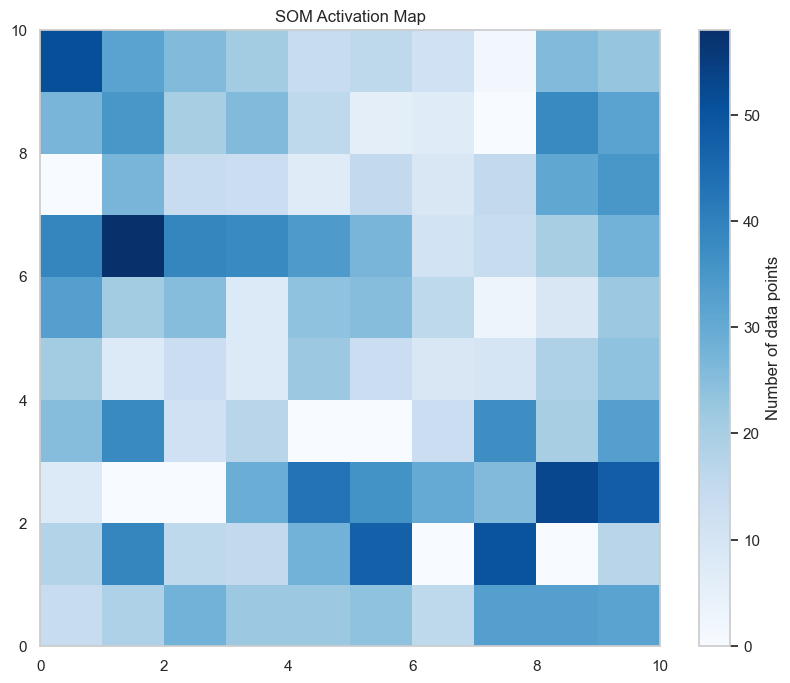

In [35]:
minmax_scaler = MinMaxScaler()
X_scaled_map = minmax_scaler.fit_transform(X)
som_size = 10 
som = MiniSom(x=som_size, y=som_size, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled_map)
som.train_random(data=X_scaled_map, num_iteration=1000)

plt.figure(figsize=(10, 8))
frequencies = som.activation_response(X_scaled_map)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar(label='Number of data points')
plt.title('SOM Activation Map')
plt.show()


# Анализ полученных результатов

Так как при переборе обе модели показали лучший результат на 2 кластерах, будем делать визуализацию и анализ разделения признаков на два кластера.

### Kmeans

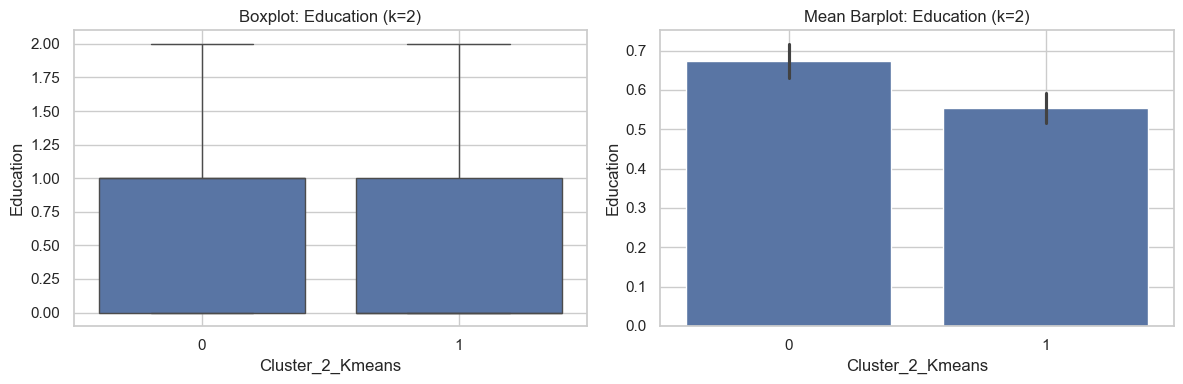

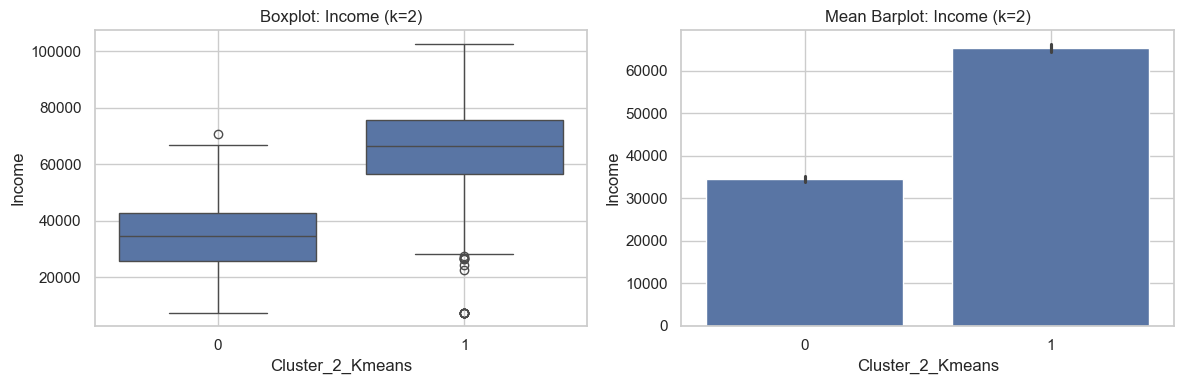

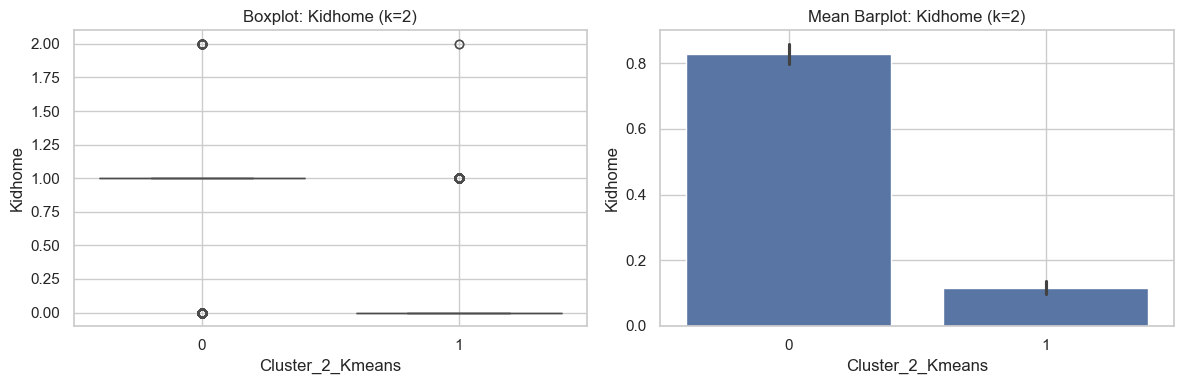

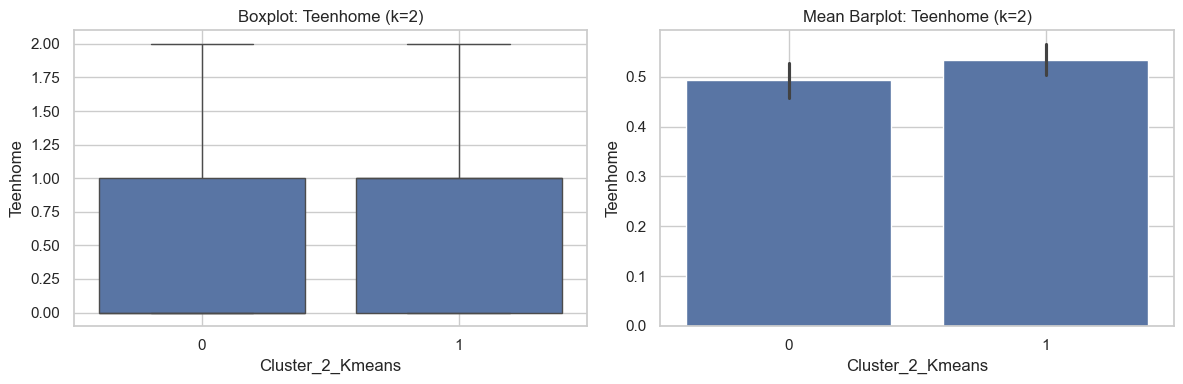

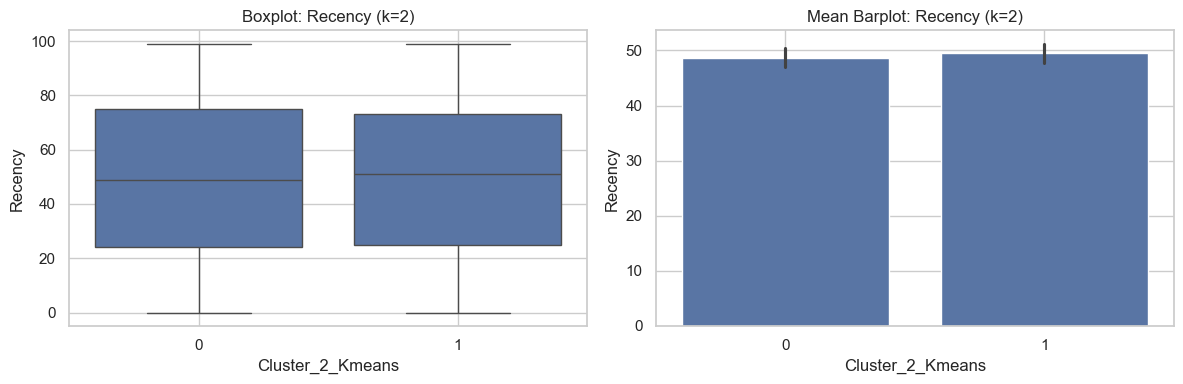

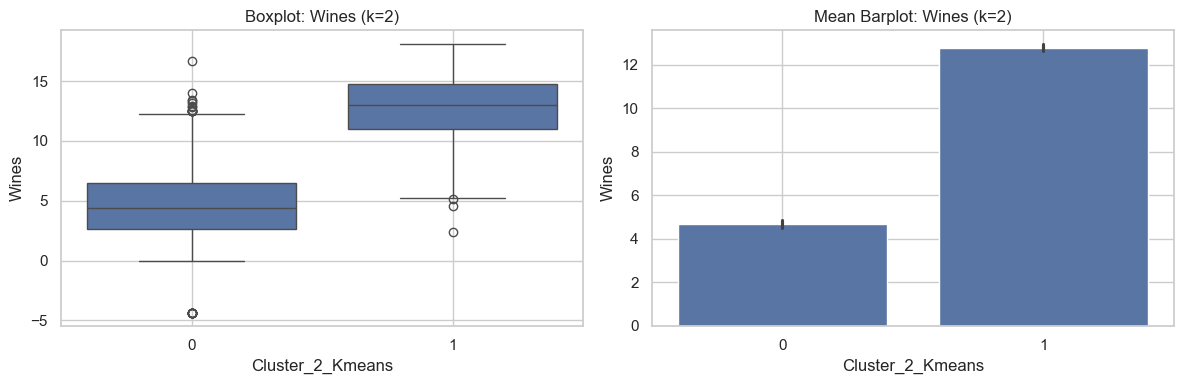

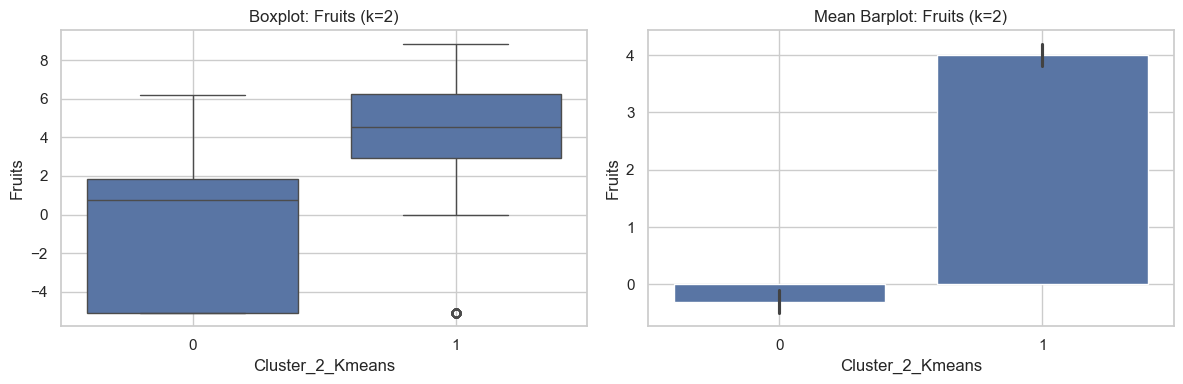

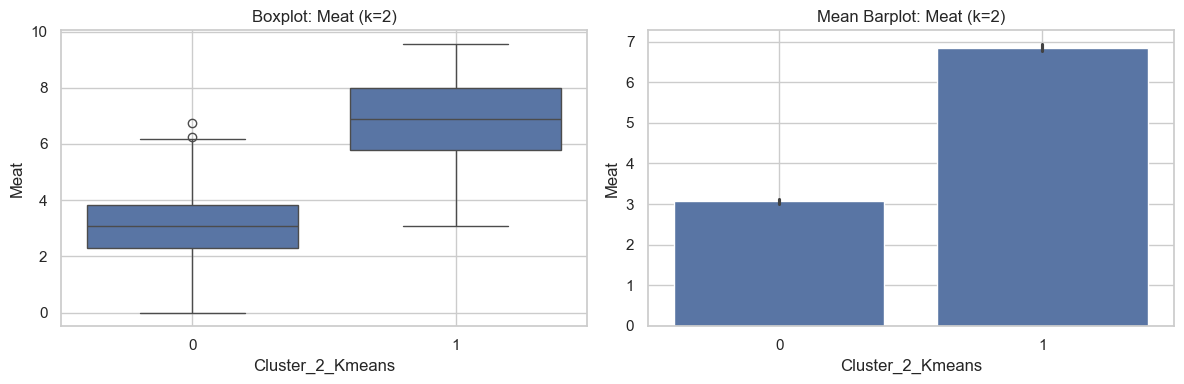

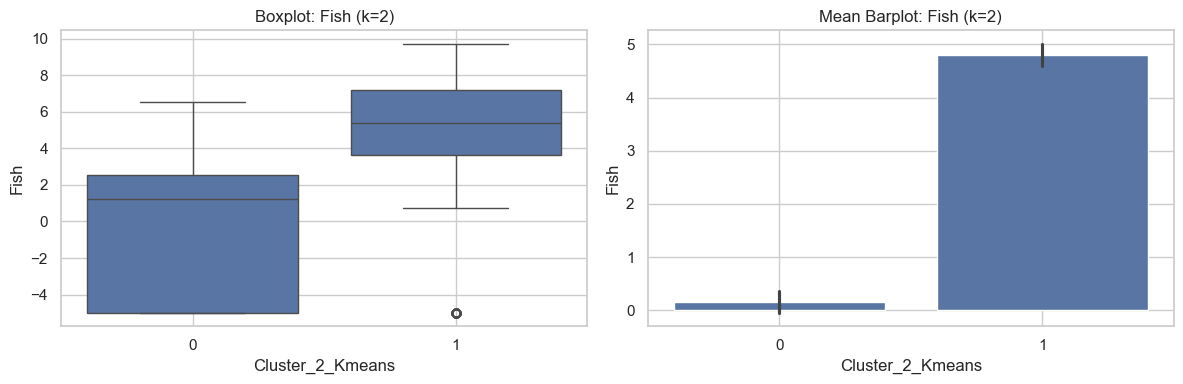

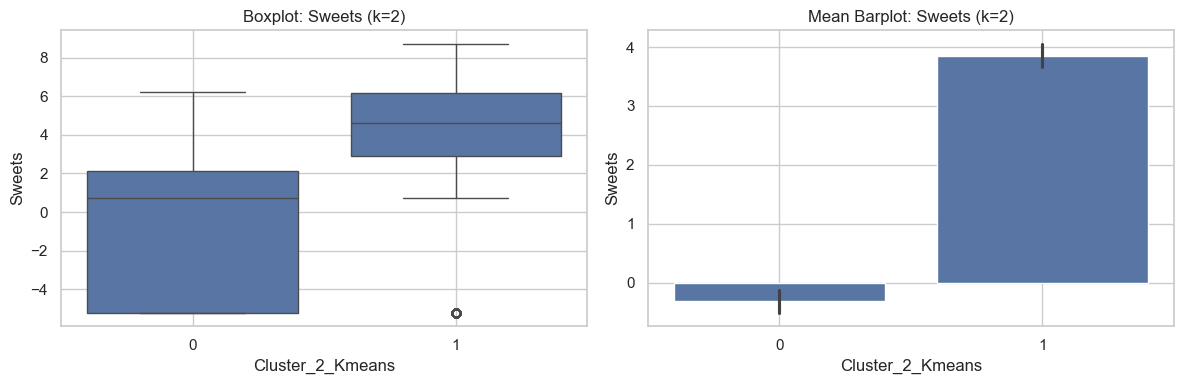

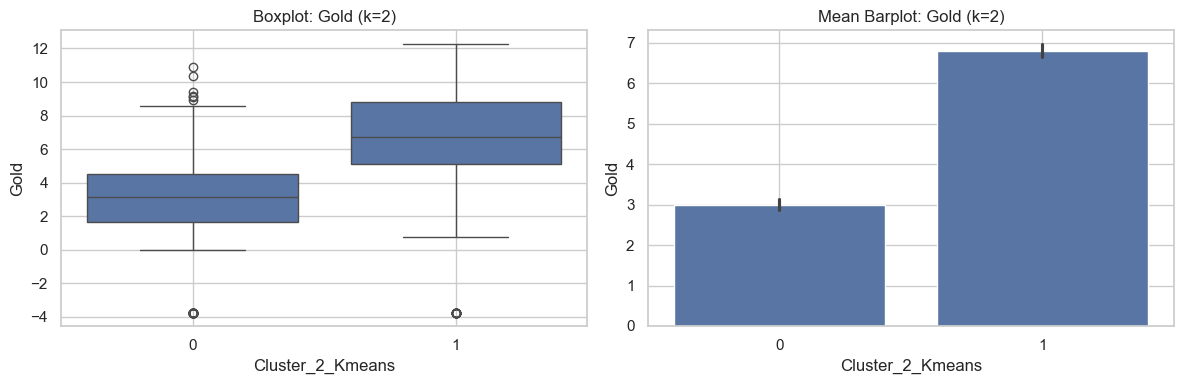

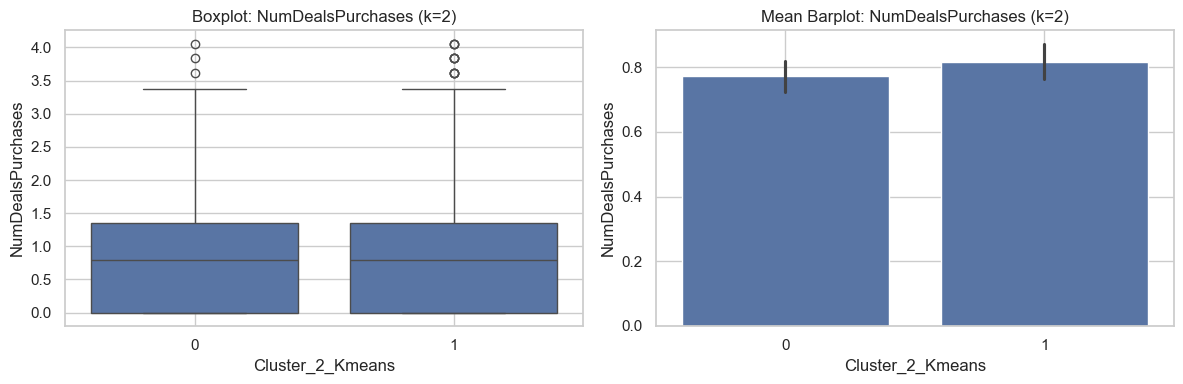

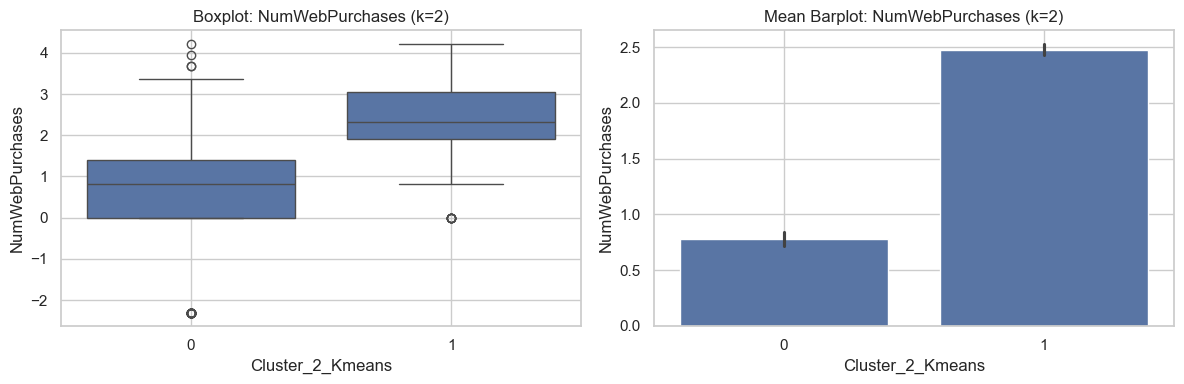

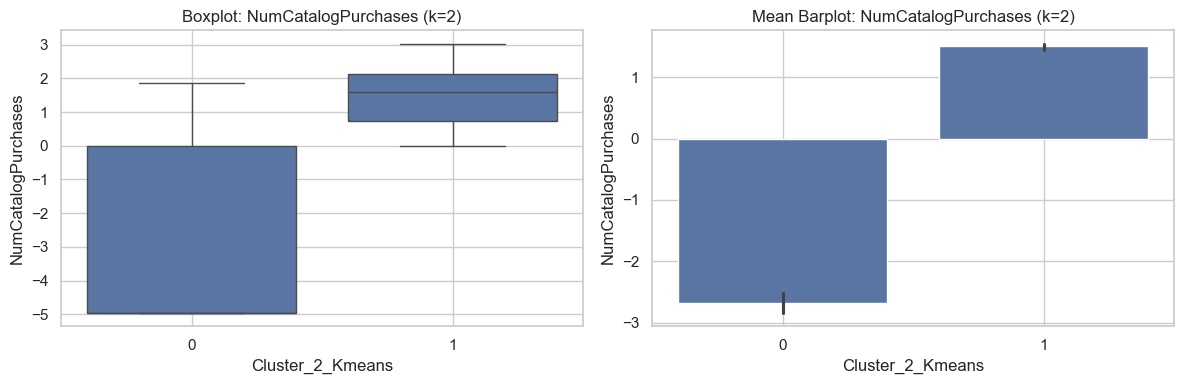

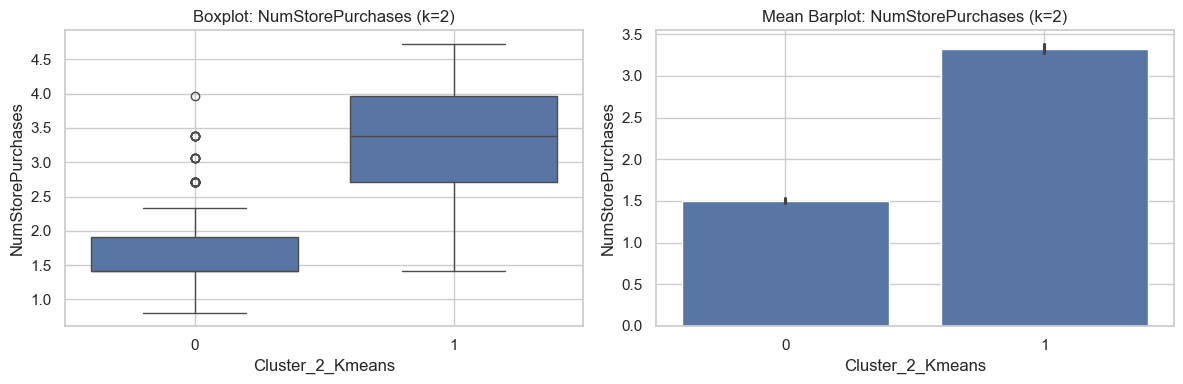

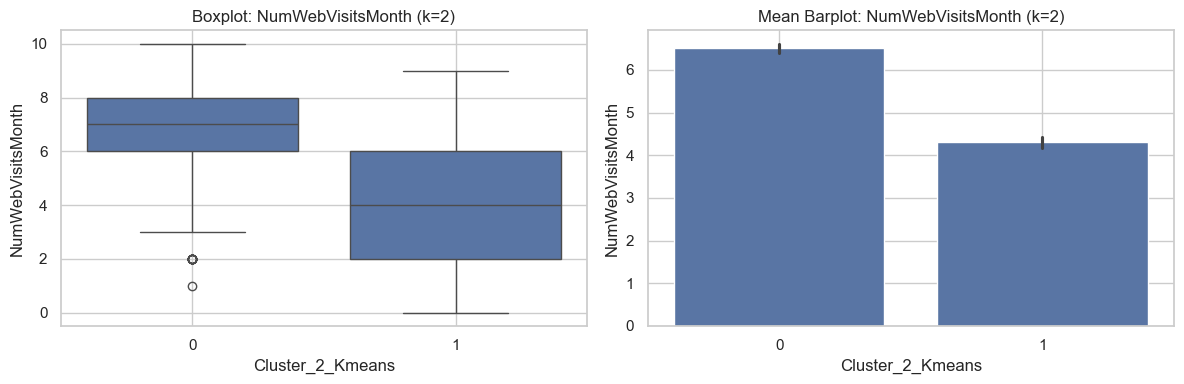

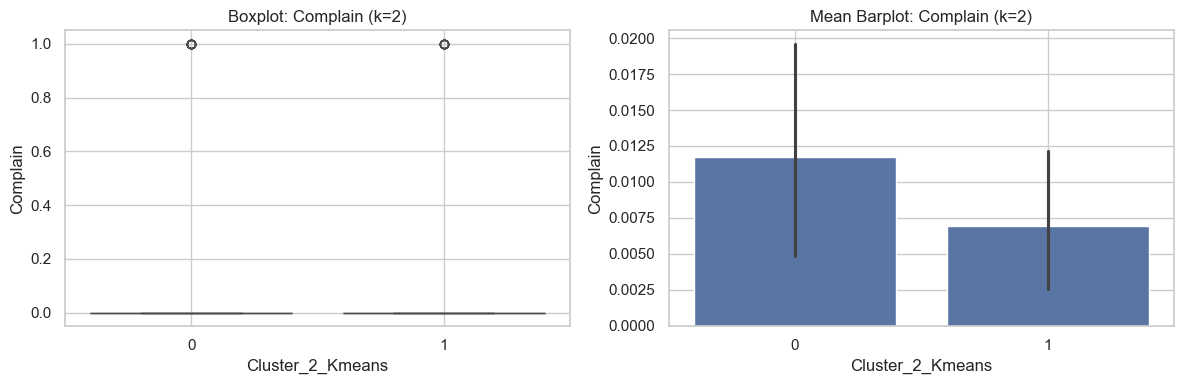

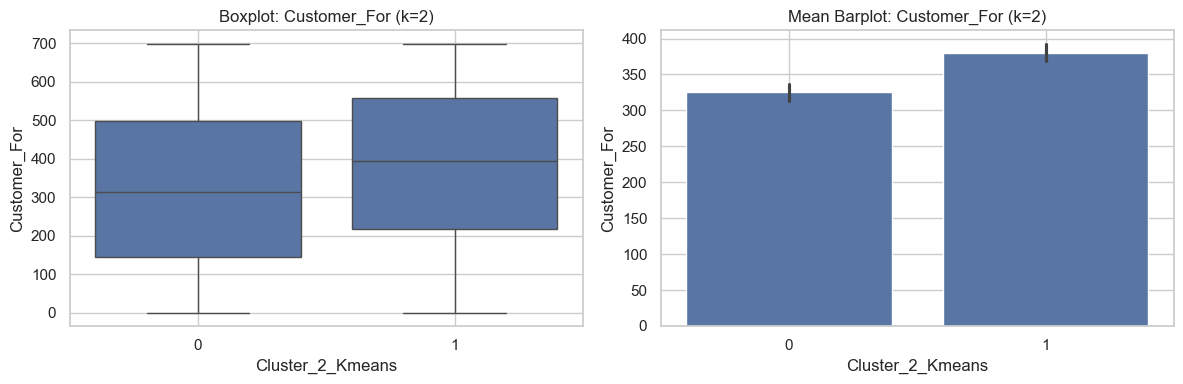

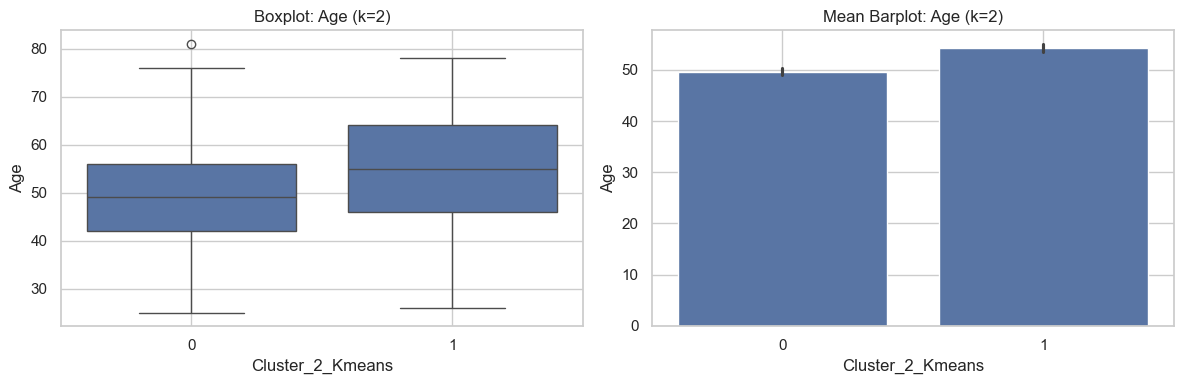

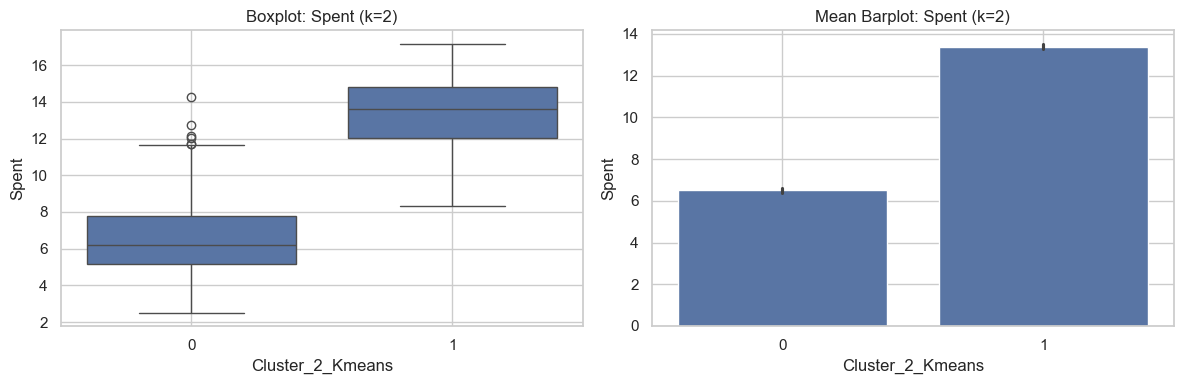

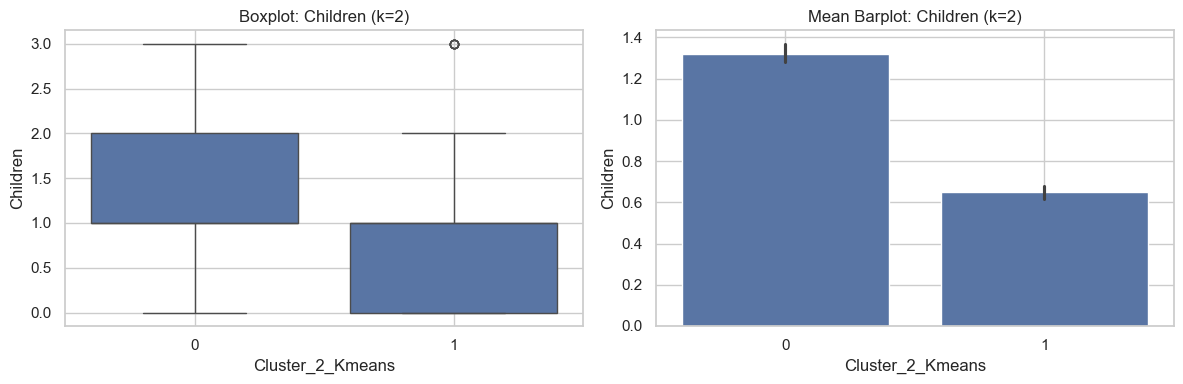

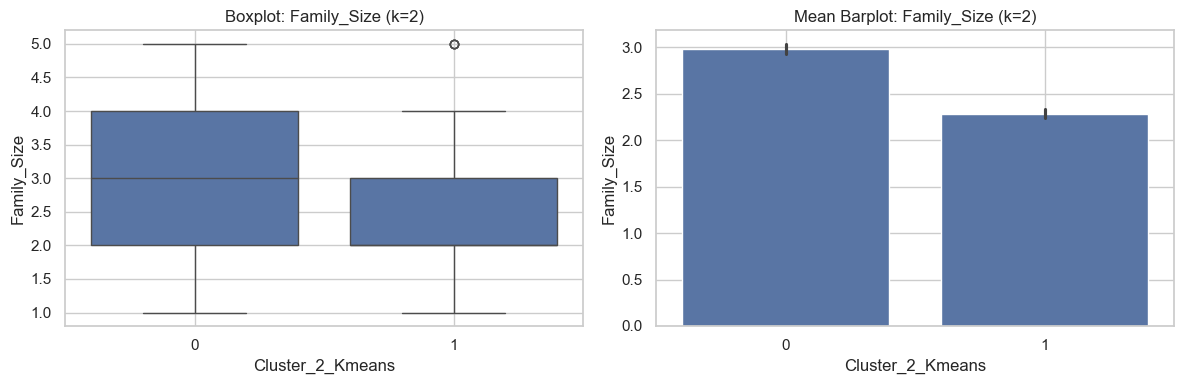

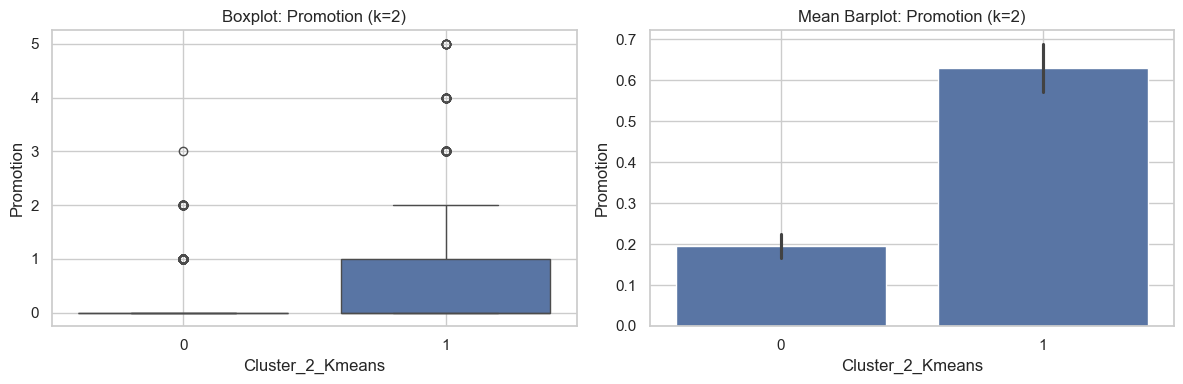

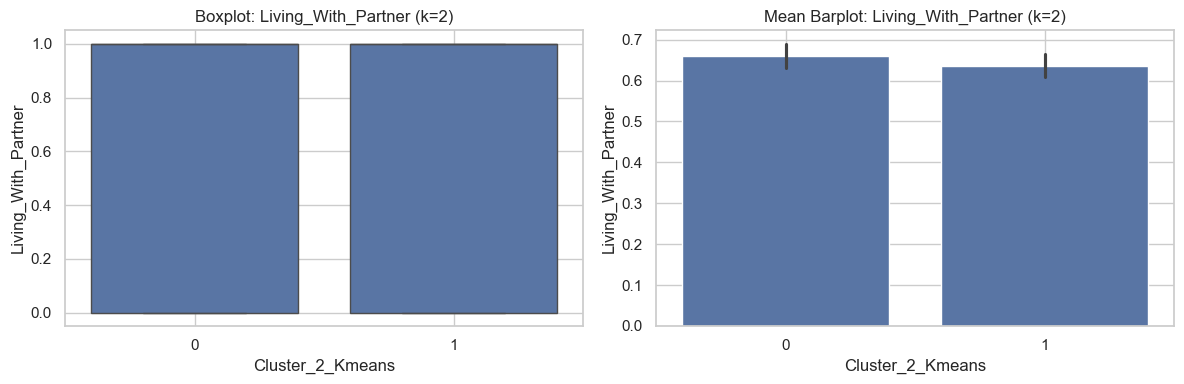

In [36]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
data[f'Cluster_{k}_Kmeans'] = kmeans.fit_predict(X_scaled)

features_to_plot = [col for col in data.columns if col not in [f'Cluster_{k}_Kmeans']]

for feature in features_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(data=data, x=f'Cluster_{k}_Kmeans', y=feature, ax=axes[0])
    axes[0].set_title(f'Boxplot: {feature} (k={k})')
    axes[0].grid(True)

    sns.barplot(data=data, x=f'Cluster_{k}_Kmeans', y=feature, ax=axes[1], estimator=np.mean)
    axes[1].set_title(f'Mean Barplot: {feature} (k={k})')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [37]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Customer_For,Age,Spent,Children,Family_Size,Promotion,Living_With_Partner,Cluster_2_Kmeans
0,0,58138.0,0,0,58,14.226934,6.887671e+00,8.493061,8.610455,6.799265e+00,...,7,0,663,64,15.411428,0,1,1,0,1
1,0,46344.0,1,1,38,3.155862,9.999996e-07,1.944989,0.739624,9.999996e-07,...,5,0,113,67,4.494922,2,3,0,0,0
2,0,71613.0,0,0,26,12.651268,5.641854e+00,6.077851,7.518697,4.022535e+00,...,4,0,312,56,12.821009,0,2,0,1,1
3,0,26646.0,1,0,26,3.155862,1.574959e+00,3.440483,2.871718,1.211481e+00,...,6,0,139,37,5.790280,1,3,0,1,0
4,1,58293.0,1,0,94,9.563260,5.381424e+00,5.964352,5.573735,4.460562e+00,...,5,0,161,40,10.916236,1,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,14.686917,5.381424e+00,6.644480,5.390369,7.458915e+00,...,5,0,381,54,14.718321,1,3,0,1,1
2236,1,64014.0,2,1,56,12.470611,-5.086333e+00,3.981880,-4.979991,-5.199898e+00,...,7,0,19,75,11.067305,3,5,1,1,0
2237,0,56981.0,0,0,91,15.760678,5.600335e+00,6.928242,4.860319,3.113760e+00,...,6,0,155,40,14.438065,0,1,1,0,1
2238,1,69245.0,0,1,8,12.668967,4.694606e+00,6.905618,6.758275,4.650015e+00,...,3,0,156,65,13.096421,1,3,0,1,1


In [38]:
cluster_col = 'Cluster_2_Kmeans'
exclude_cols = ['Cluster_2_Agglo', cluster_col]
features = [col for col in data.columns if col not in exclude_cols]

anova_results = []

for feature in features:
    groups = [data[data[cluster_col] == label][feature] for label in data[cluster_col].unique()]

    normal = all(shapiro(group.sample(min(len(group), 1000)))[1] > 0.05 for group in groups)

    if normal:
        stat, p = f_oneway(*groups)
        anova_results.append((feature, p, 'ANOVA'))
    else:
        stat, p = mannwhitneyu(groups[0], groups[1], alternative='two-sided')
        anova_results.append((feature, p, 'Mann-Whitney'))

anova_df = pd.DataFrame(anova_results, columns=['Feature', 'p-value', 'Method'])

significant = anova_df[anova_df['p-value'] < 0.05]

print("Значимые признаки между кластерами:")
print(significant.sort_values('p-value').to_string(index=False))

num_significant = significant.shape[0]
print(f"Количество значимых признаков между кластерами: {num_significant}")

Значимые признаки между кластерами:
            Feature       p-value       Method
              Wines  0.000000e+00 Mann-Whitney
               Meat  0.000000e+00 Mann-Whitney
  NumStorePurchases  0.000000e+00 Mann-Whitney
              Spent  0.000000e+00 Mann-Whitney
NumCatalogPurchases 6.424572e-310 Mann-Whitney
             Income 1.886135e-281 Mann-Whitney
    NumWebPurchases 8.592726e-230 Mann-Whitney
            Kidhome 7.669391e-216 Mann-Whitney
               Fish 2.415792e-204 Mann-Whitney
             Fruits 2.617761e-197 Mann-Whitney
               Gold 3.792806e-194 Mann-Whitney
             Sweets 3.315031e-187 Mann-Whitney
  NumWebVisitsMonth 5.346090e-109 Mann-Whitney
           Children  1.369812e-99 Mann-Whitney
        Family_Size  2.520108e-72 Mann-Whitney
          Promotion  2.761380e-30 Mann-Whitney
                Age  8.569438e-21 Mann-Whitney
       Customer_For  6.254088e-10 Mann-Whitney
          Education  5.310996e-04 Mann-Whitney
Количество значимых приз

### Agglomerative Clustering

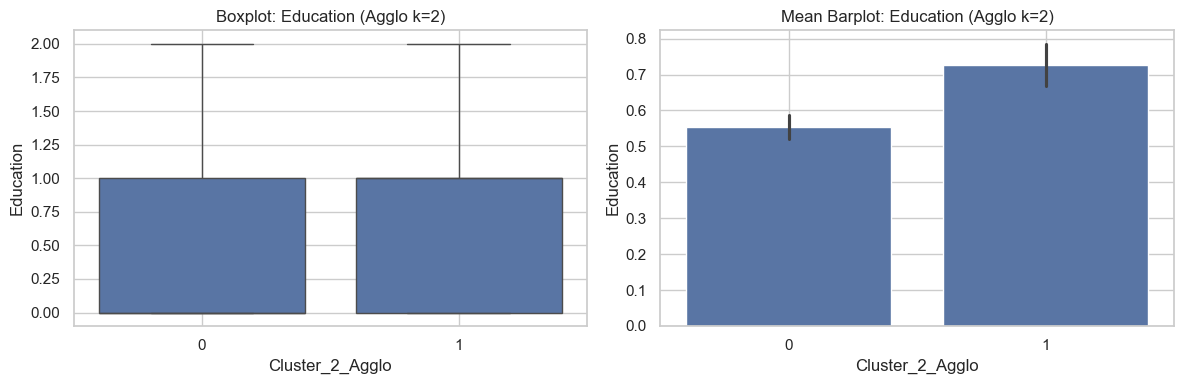

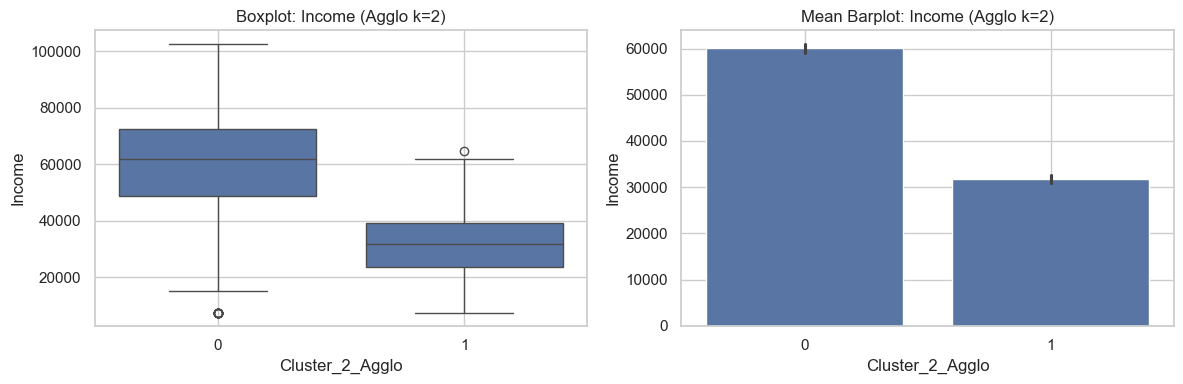

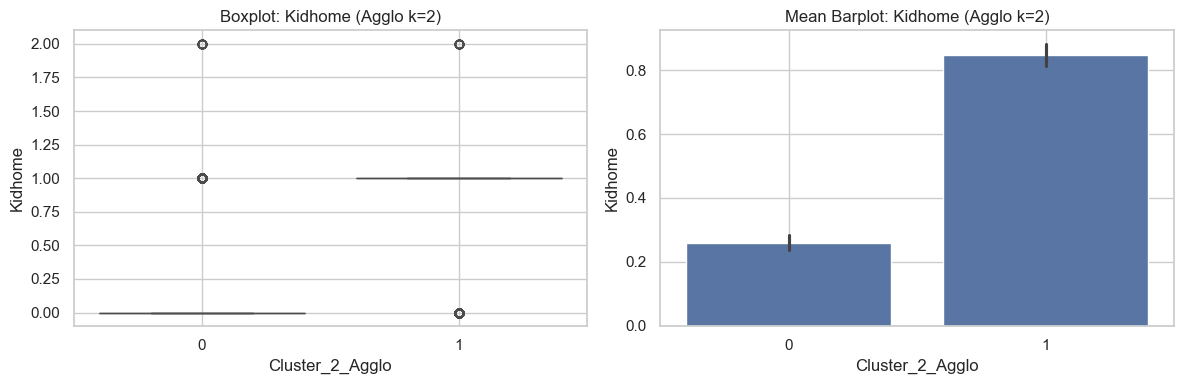

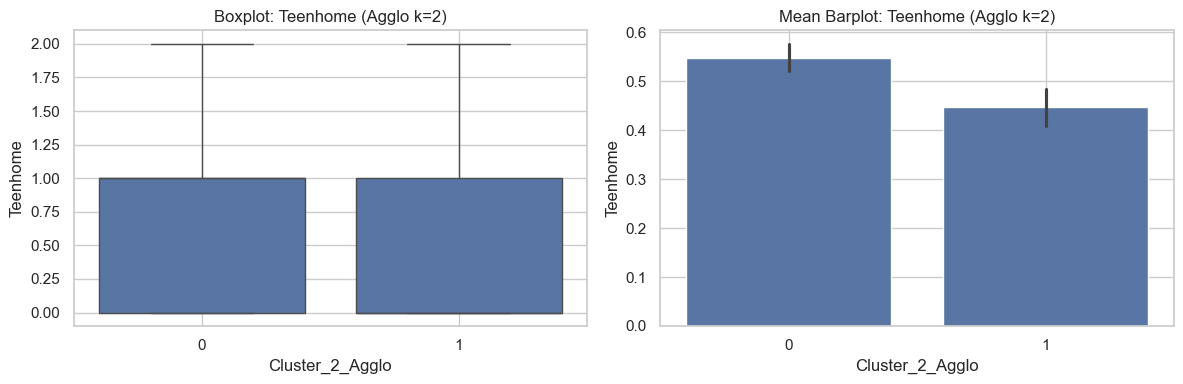

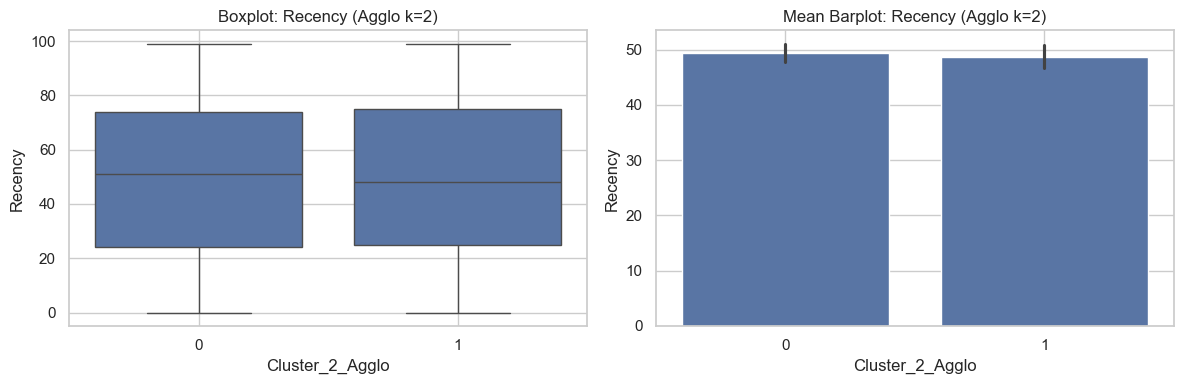

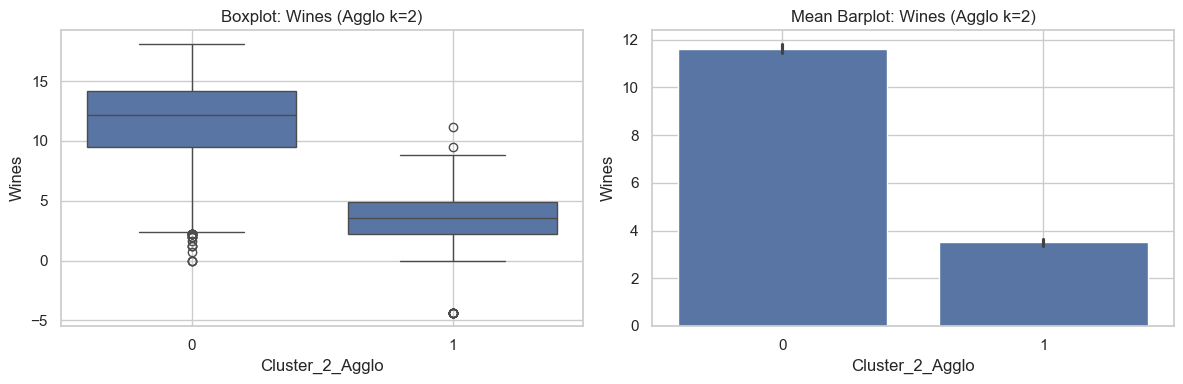

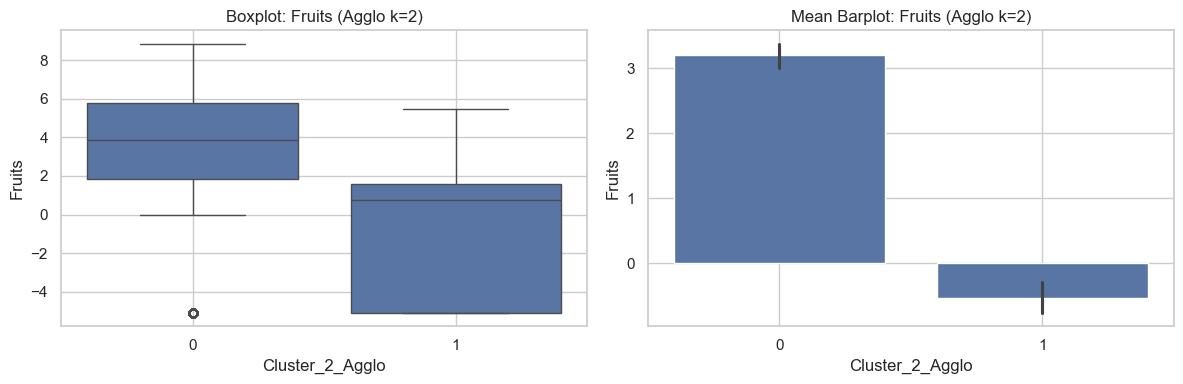

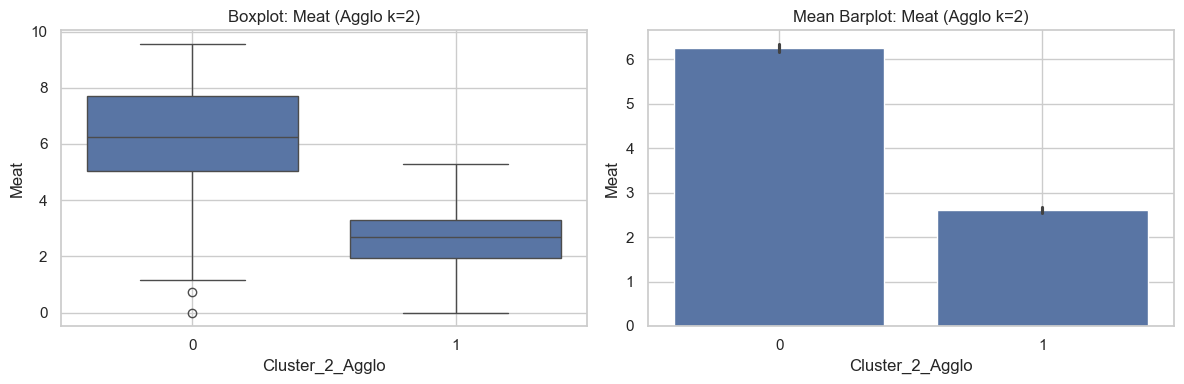

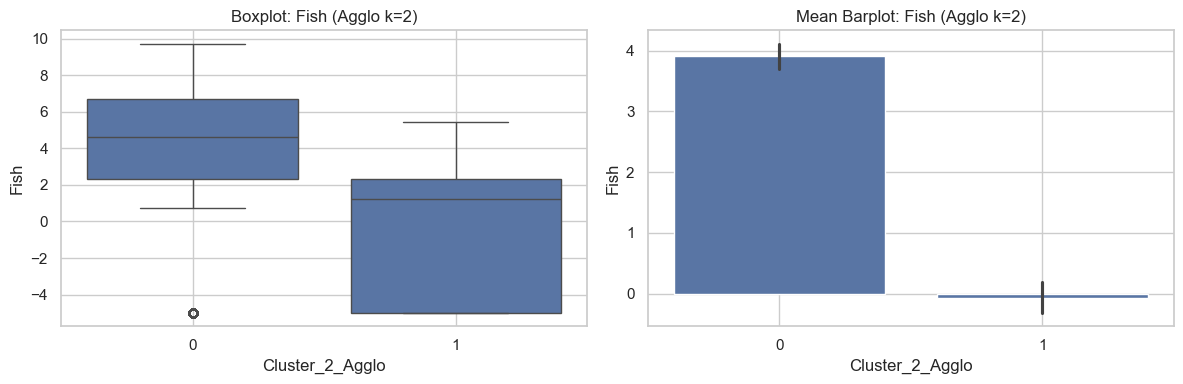

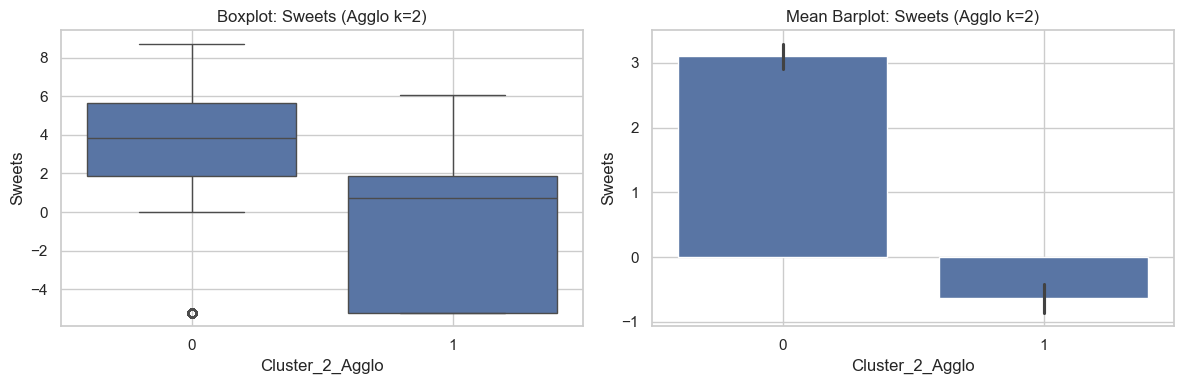

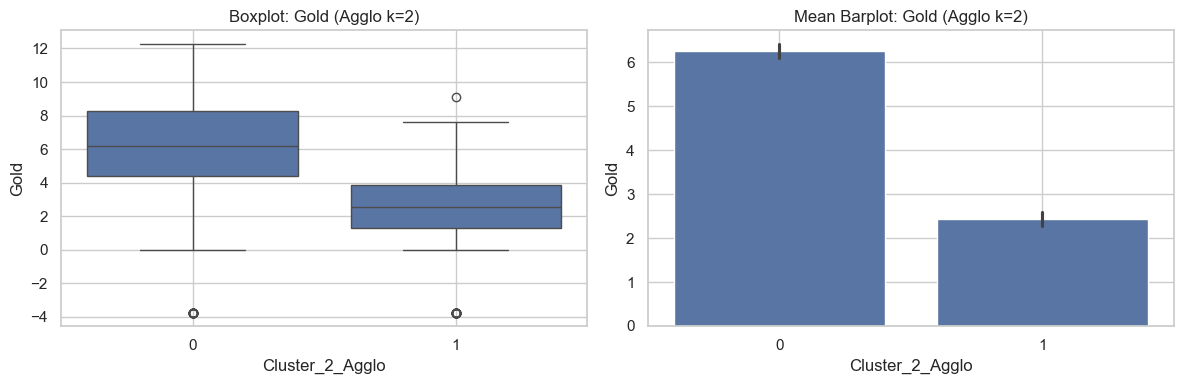

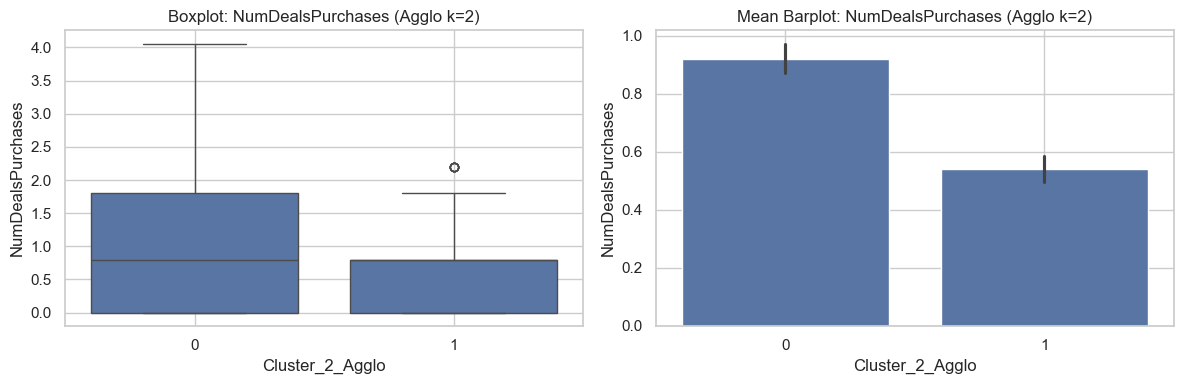

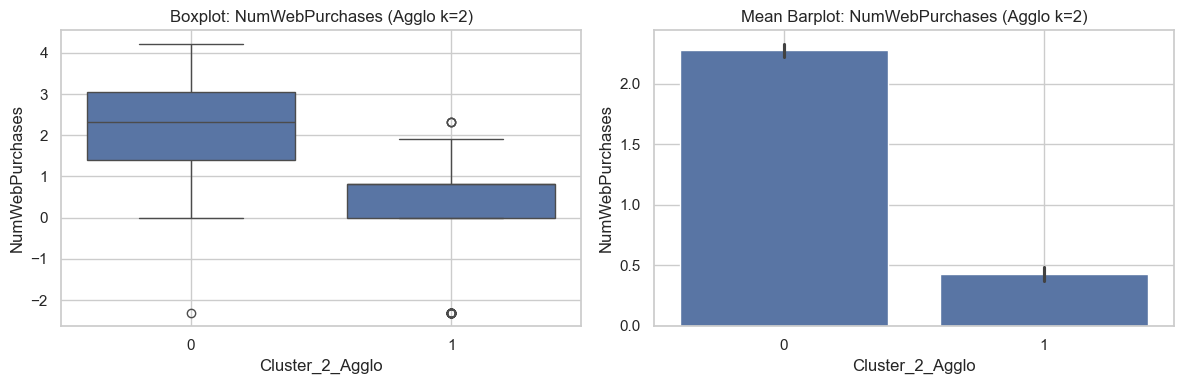

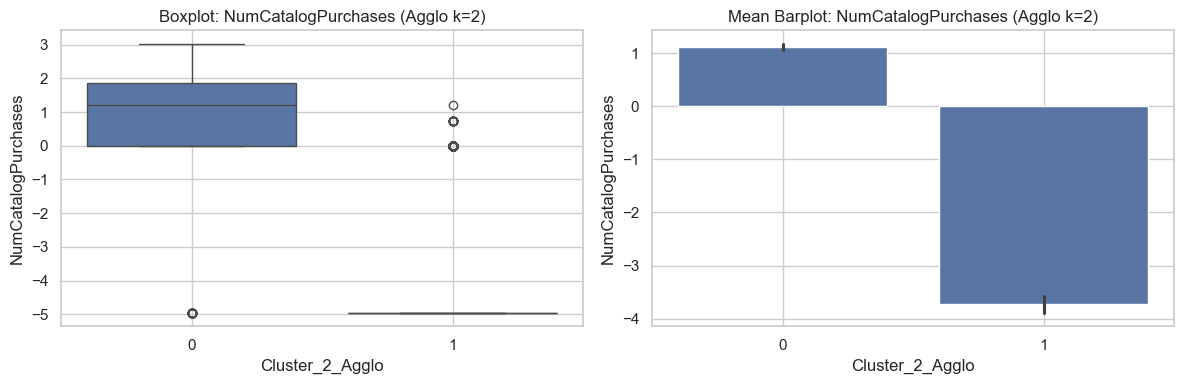

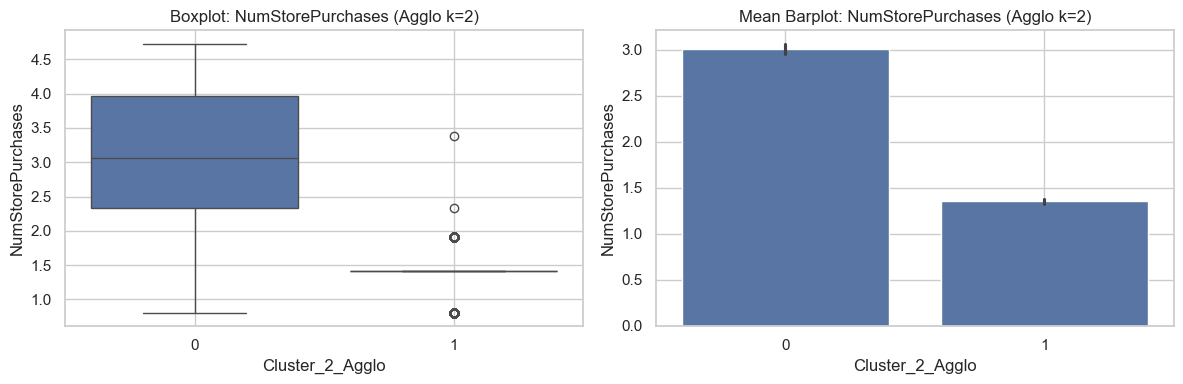

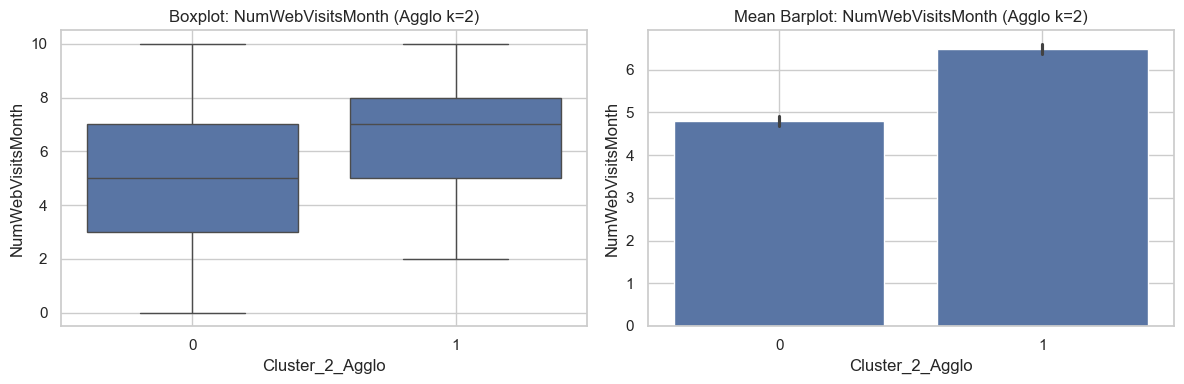

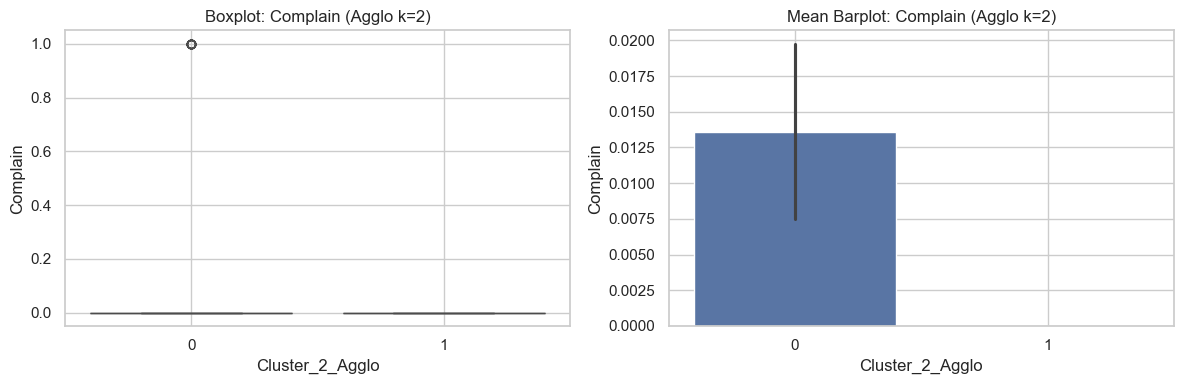

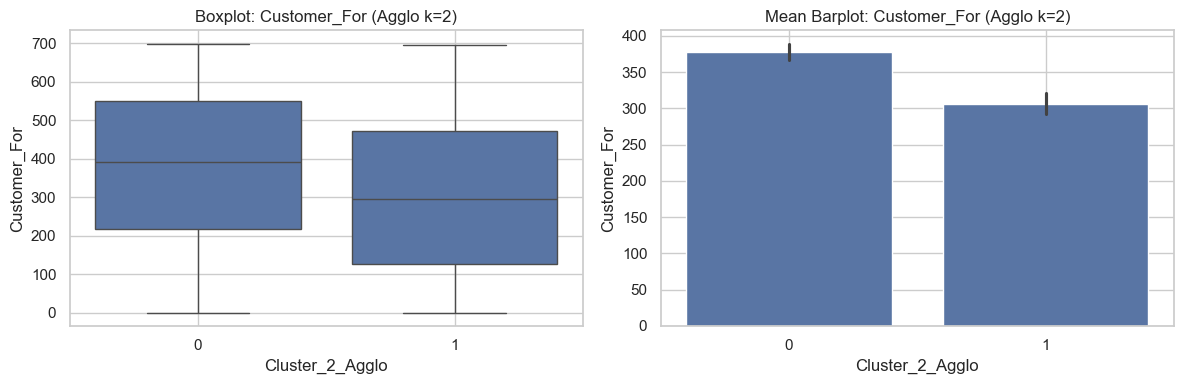

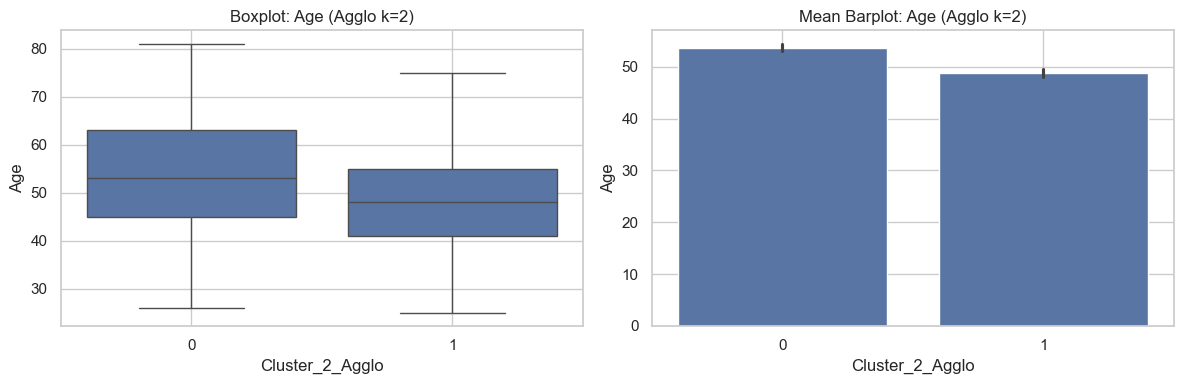

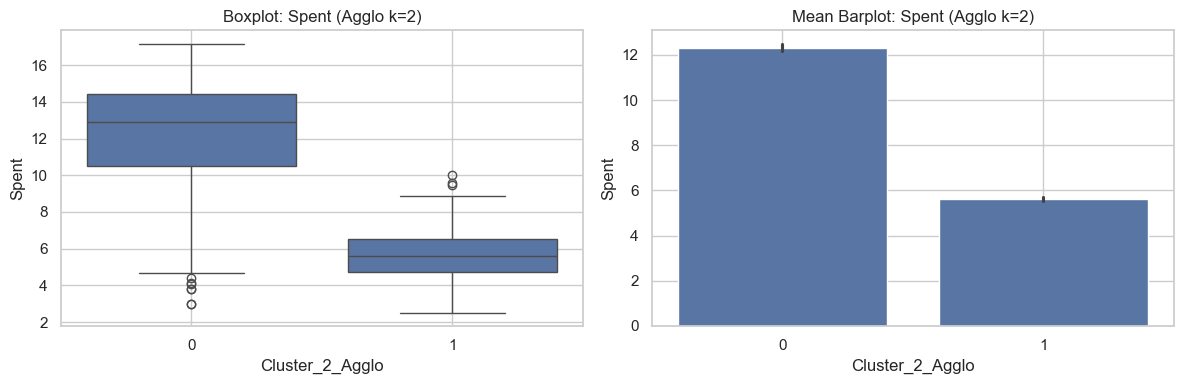

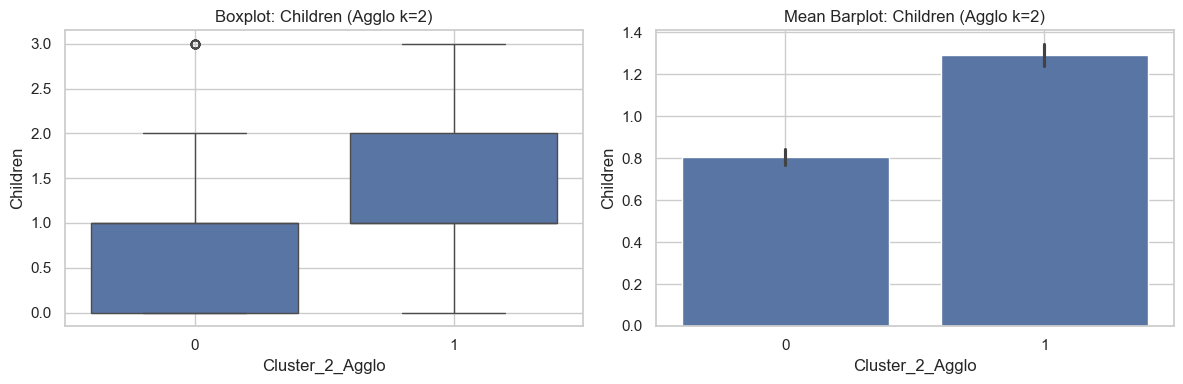

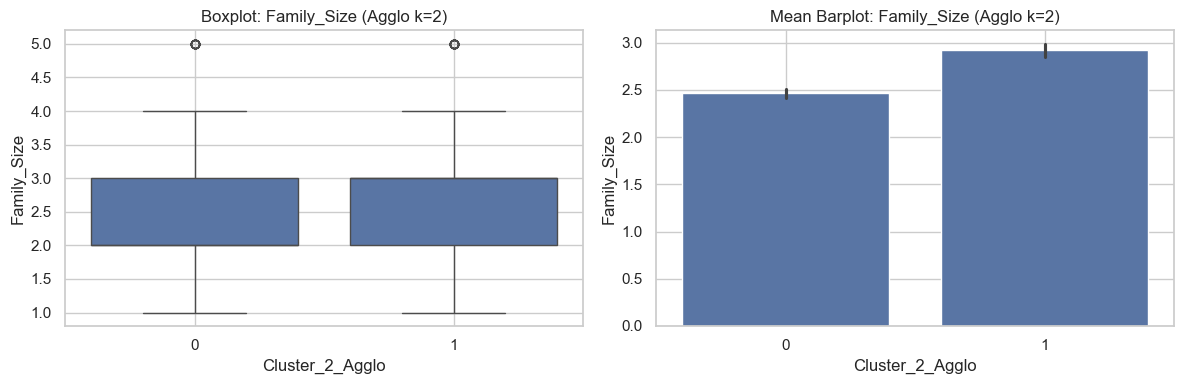

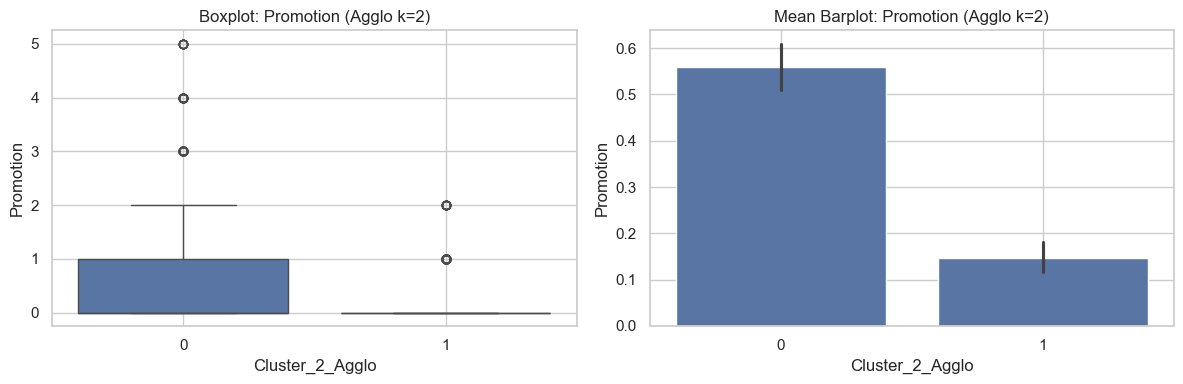

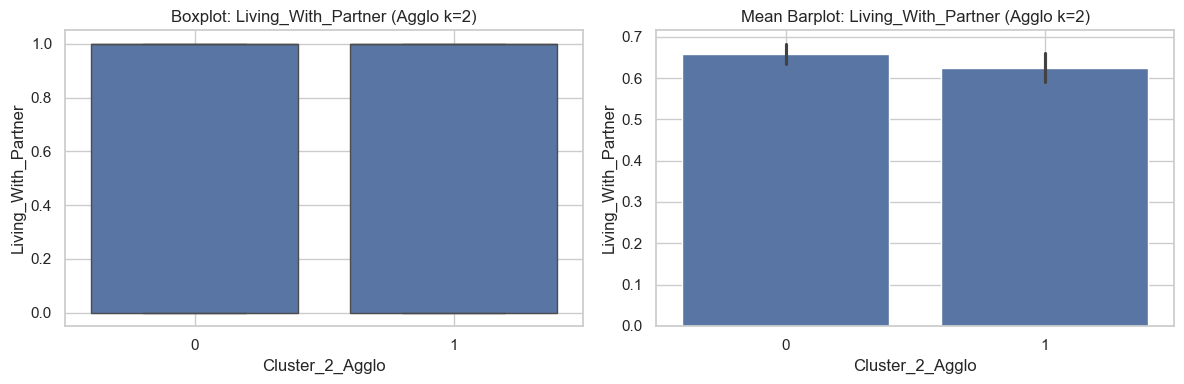

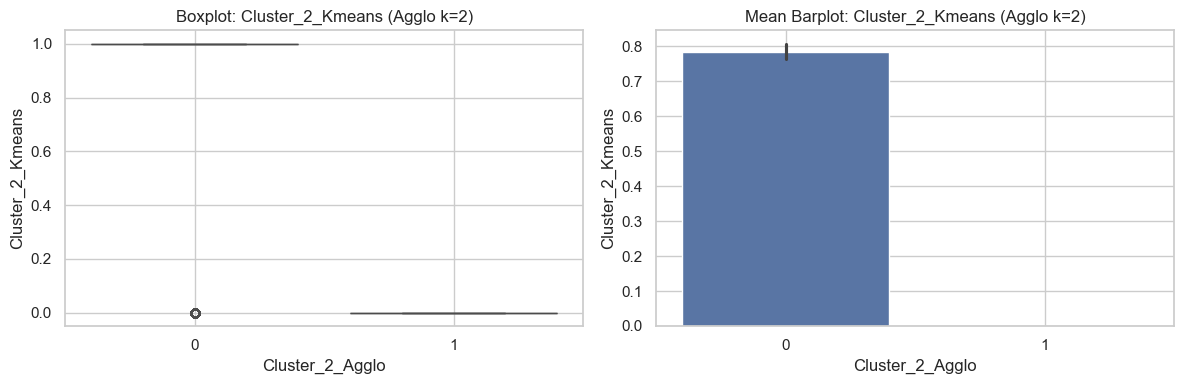

In [39]:
k = 2

linkage_method = 'ward'
agglo = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)

data[f'Cluster_{k}_Agglo'] = agglo.fit_predict(X_scaled)

features_to_plot = [col for col in data.columns if col not in [f'Cluster_{k}_Agglo']]

for feature in features_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(data=data, x=f'Cluster_{k}_Agglo', y=feature, ax=axes[0])
    axes[0].set_title(f'Boxplot: {feature} (Agglo k={k})')
    axes[0].grid(True)

    sns.barplot(data=data, x=f'Cluster_{k}_Agglo', y=feature, ax=axes[1], estimator=np.mean)
    axes[1].set_title(f'Mean Barplot: {feature} (Agglo k={k})')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [40]:
cluster_col = 'Cluster_2_Agglo'
exclude_cols = ['Cluster_2_Kmeans', cluster_col]
features = [col for col in data.columns if col not in exclude_cols]

anova_results = []

for feature in features:
    groups = [data[data[cluster_col] == label][feature] for label in data[cluster_col].unique()]

    normal = all(shapiro(group.sample(min(len(group), 1000)))[1] > 0.05 for group in groups)

    if normal:
        stat, p = f_oneway(*groups)
        anova_results.append((feature, p, 'ANOVA'))
    else:
        stat, p = mannwhitneyu(groups[0], groups[1], alternative='two-sided')
        anova_results.append((feature, p, 'Mann-Whitney'))

anova_df = pd.DataFrame(anova_results, columns=['Feature', 'p-value', 'Method'])

significant = anova_df[anova_df['p-value'] < 0.05]

print("Значимые признаки между кластерами:")
print(significant.sort_values('p-value').to_string(index=False))

num_significant = significant.shape[0]
print(f"Количество значимых признаков между кластерами: {num_significant}")

Значимые признаки между кластерами:
            Feature       p-value       Method
              Spent 1.645081e-285 Mann-Whitney
              Wines 1.176988e-270 Mann-Whitney
               Meat 3.744387e-268 Mann-Whitney
NumCatalogPurchases 6.541344e-267 Mann-Whitney
  NumStorePurchases 2.393600e-240 Mann-Whitney
    NumWebPurchases 8.270549e-236 Mann-Whitney
             Income 4.436626e-208 Mann-Whitney
               Gold 1.414647e-175 Mann-Whitney
            Kidhome 7.408658e-135 Mann-Whitney
               Fish 1.343894e-131 Mann-Whitney
             Sweets 1.588912e-126 Mann-Whitney
             Fruits 2.256853e-126 Mann-Whitney
  NumWebVisitsMonth  1.515230e-55 Mann-Whitney
           Children  8.119734e-48 Mann-Whitney
        Family_Size  8.313127e-28 Mann-Whitney
          Promotion  1.760804e-27 Mann-Whitney
                Age  6.771766e-21 Mann-Whitney
  NumDealsPurchases  3.411105e-15 Mann-Whitney
       Customer_For  1.432711e-14 Mann-Whitney
          Education  1.2

# Резюме результатов

При корреляции не больше 0.75

| Метод                    | Кол-во кластеров | Silhouette Score | Calinski-Harabasz Index | Davies-Bouldin Index | Значимых признаков |
|-------------------------|------------------|-------------------|--------------------------|----------------------|---------------------|
| K-Means                 | 2                | 0.2479            | 835.77                   | 1.5574               | 19                  |
| Agglomerative Clustering| 2 (linkage=ward) | 0.3446            | 628.01                   | 1.6289               | 22                  |
